# **Project- Unsupervised ML - Netflix Movies and TV Shows**    




##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -Anshika Dixit**


# **Project Summary -**

Project Overview and Business Context
This project aims to analyze a dataset of TV shows and movies available on Netflix as of 2019. The business context highlights a shift in Netflix's content strategy, with a significant increase in TV shows and a decrease in movies since 2010. Our goal is to explore this trend, understand content distribution across countries, and ultimately, cluster similar content using text-based features.


  Project Objectives:
    

*  Perform comprehensive Exploratory Data Analysis (EDA).
*   Understand content distribution by type and country.


*  Analyze the trend of Netflix focusing on TV shows versus movies over time.
*  Cluster similar content based on text features (description, listed_in,    director, cast).

*   Provide actionable insights and strategies based on the formed clusters.






# **GitHub Link -**

https://github.com/Ansh1kaDixit/CapstoneNetflix.git

# **Streamlit App Link -**

https://netflixcapstone.streamlit.app/#results

# **Project Start**


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
# Set plot style
sns.set_style("whitegrid")



### Dataset Loading


In [2]:
# URLs for datasets
netflix_url = 'https://drive.google.com/uc?export=download&id=1I3Z_5XgzRw_mlZkou2VBTD11KONld7m5'
external_url = 'https://drive.google.com/uc?export=download&id=1FybEw-IcffTiuns8tln_Bp38LyqpWhQd'
try:
    # Step 1: Load the main Netflix dataset
    content_main = requests.get(netflix_url).content
    df = pd.read_csv(io.StringIO(content_main.decode('utf-8')))
    print("Main Netflix dataset loaded successfully!") # Confirmation for step 1

    # Step 2: Load the external score dataset
    content_ext = requests.get(external_url).content
    external_df = pd.read_csv(io.StringIO(content_ext.decode('utf-8')))
    print("External dataset loaded successfully!") # Confirmation for step 2

    # Step 3: Merge the datasets
    # Using 'title' from the main df and 'Title' from the external df
    df = pd.merge(df, external_df, left_on='title', right_on='Title', how='left')
    print("Datasets merged successfully!") # Confirmation for step 3

    # Step 4: Cleanup and numeric processing
    # Remove the duplicate Title column and process score columns
    if 'Title' in df.columns:
        df.drop('Title', axis=1, inplace=True)

    score_cols = [c for c in df.columns if 'Score' in c or 'Rating' in c]
    for col in score_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Impute missing scores with the median to maintain numerical data integrity
        df[col] = df[col].fillna(df[col].median())

    print("Score columns processed and missing values imputed.") # Final processing step

except Exception as e:
    # Captures errors at any specific step for debugging
    print(f"An error occurred during data processing: {e}")

Main Netflix dataset loaded successfully!
External dataset loaded successfully!
Datasets merged successfully!
Score columns processed and missing values imputed.


d:\sdk\python3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Dataset First View

In [3]:
# Dataset First Look
print("### 3.1 Glimpse of the Data (df.head()) ###")
display(df.head())

### 3.1 Glimpse of the Data (df.head()) ###


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,2016-11-25,NaN,https://www.netflix.com/watch/80074220,https://www.imdb.com/title/tt4922804,In a future where the elite inhabit an island ...,21653.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,2016-12-23,"Alameda Films, Alebrije Cine y Video",https://www.netflix.com/watch/80134885,https://www.imdb.com/title/tt5979312,After a devastating earthquake hits Mexico Cit...,562.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=sWJ5PlHL2kM,YouTube
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,2015-04-14,NaN,https://www.netflix.com/watch/70270949,https://www.imdb.com/title/tt2100376,"When an army recruit is found dead, his fellow...",848.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,http://ia.media-imdb.com/images/M/MV5BMTM3Mjk4...,https://www.youtube.com/watch?v=1zuDFDjakIM,YouTube
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,2015-04-14,"Trigger Street Productions, Michael De Luca",https://www.netflix.com/watch/70084788,https://www.imdb.com/title/tt0478087,A brilliant group of students become card-coun...,230337.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2v9z9EACSnU,YouTube


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("\n### 3.2 Dataset Information (df.info()) ###")
df.info()


### 3.2 Dataset Information (df.info()) ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   show_id                8033 non-null   object 
 1   type                   8033 non-null   object 
 2   title                  8033 non-null   object 
 3   director               5537 non-null   object 
 4   cast                   7303 non-null   object 
 5   country                7504 non-null   object 
 6   date_added             8023 non-null   object 
 7   release_year           8033 non-null   int64  
 8   rating                 8026 non-null   object 
 9   duration               8033 non-null   object 
 10  listed_in              8033 non-null   object 
 11  description            8033 non-null   object 
 12  Genre                  5458 non-null   object 
 13  Tags                   5780 non-null   object 
 14  Languages  

### Dataset Information

In [5]:
# Dataset Info
print("\n### 3.3 Descriptive Statistics (df.describe()) ###")
display(df.describe())


### 3.3 Descriptive Statistics (df.describe()) ###


,release_year,Hidden Gem Score,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,8033.000000,8033.000000,0.0,8033.000000,8033.000000,8033.000000,2090.000000,2719.000000,5.341000e+03
mean,2013.953318,6.460339,NaN,6.555185,65.579858,57.977343,8.892823,14.423317,3.098083e+04
std,8.736141,1.772761,NaN,0.971427,14.009606,6.987306,18.766230,31.787765,1.070023e+05
min,1925.000000,0.700000,NaN,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,2013.000000,5.900000,NaN,6.300000,67.000000,58.000000,1.000000,2.000000,3.860000e+02
50%,2017.000000,7.000000,NaN,6.600000,67.000000,58.000000,3.000000,5.000000,2.054000e+03
75%,2018.000000,7.600000,NaN,7.000000,67.000000,58.000000,8.000000,12.000000,1.143300e+04
max,2021.000000,9.600000,NaN,9.500000,100.000000,99.000000,251.000000,386.000000,2.072912e+06


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("\n### 3.4 Duplicate Values (df.duplicated().sum()) ###")
print(f"Number of duplicate values: {df.duplicated().sum()}")


### 3.4 Duplicate Values (df.duplicated().sum()) ###
Number of duplicate values: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("\n### 3.5 Missing Values (df.isnull().sum()) ###")
print(df.isnull().sum())


### 3.5 Missing Values (df.isnull().sum()) ###
show_id                     0
type                        0
title                       0
director                 2496
cast                      730
country                   529
date_added                 10
release_year                0
rating                      7
duration                    0
listed_in                   0
description                 0
Genre                    2575
Tags                     2253
Languages                2759
Series or Movie          2232
Hidden Gem Score            0
Country Availability     2240
Runtime                  2233
Director                 4187
Writer                   3902
Actors                   2692
View Rating              8033
IMDb Score                  0
Rotten Tomatoes Score       0
Metacritic Score            0
Awards Received          5943
Awards Nominated For     5314
Boxoffice                7000
Release Date             2774
Netflix Release Date     2232
Production House      


### 3.6 Visualizing Missing Values ###


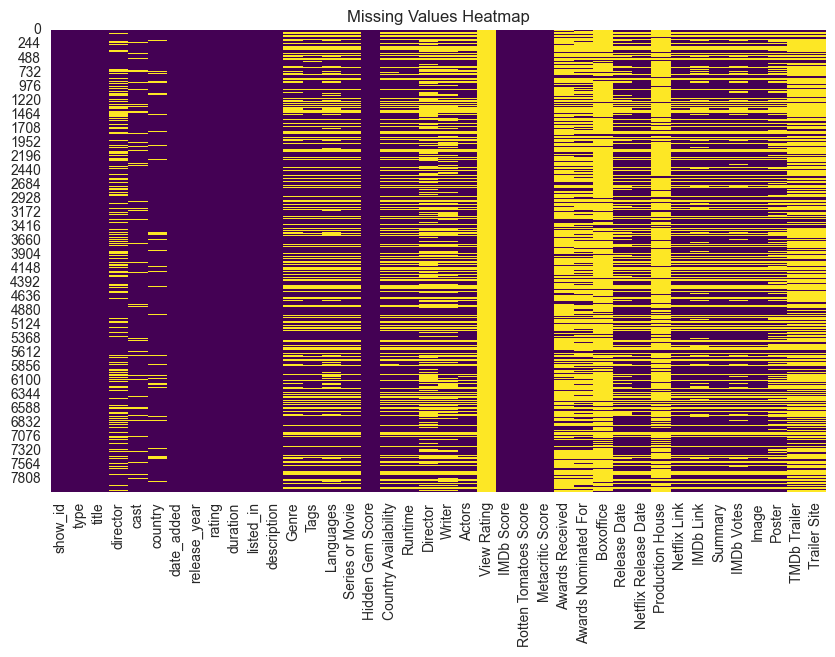

In [8]:
# Visualizing the missing values
print("\n### 3.6 Visualizing Missing Values ###")
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



### What did you know about your dataset?

> Based on the initial inspection of the dataset, here is what I've gathered:

The dataset contains information about Netflix TV shows and movies.
It has 7787 rows and 12 columns.
The columns include show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description.
There are no duplicate rows in the dataset.
Several columns contain missing values, most notably director, cast, and country. date_added and rating also have a small number of missing values.



## ***2. Understanding Your Variables***

In [9]:
# Dataset Describe
df.describe()

,release_year,Hidden Gem Score,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,8033.000000,8033.000000,0.0,8033.000000,8033.000000,8033.000000,2090.000000,2719.000000,5.341000e+03
mean,2013.953318,6.460339,NaN,6.555185,65.579858,57.977343,8.892823,14.423317,3.098083e+04
std,8.736141,1.772761,NaN,0.971427,14.009606,6.987306,18.766230,31.787765,1.070023e+05
min,1925.000000,0.700000,NaN,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,2013.000000,5.900000,NaN,6.300000,67.000000,58.000000,1.000000,2.000000,3.860000e+02
50%,2017.000000,7.000000,NaN,6.600000,67.000000,58.000000,3.000000,5.000000,2.054000e+03
75%,2018.000000,7.600000,NaN,7.000000,67.000000,58.000000,8.000000,12.000000,1.143300e+04
max,2021.000000,9.600000,NaN,9.500000,100.000000,99.000000,251.000000,386.000000,2.072912e+06







### Variables Description

Here is a description of the variables in the df DataFrame:

- **show_id**: A unique identifier for each show or movie.
- **type**: The type of content, either 'Movie' or 'TV Show'.
- **title**: The title of the show or movie.
- **director**: The director(s) of the movie or TV show. This column has missing values.
- **cast**: The main actors in the show or movie. This column has missing values.
- **country**: The country where the show or movie was produced. This column has missing values.
- **date_added**: The date the content was added to Netflix. This column has missing values.
- **release_year**: The year the content was originally released.
- **rating**: The rating of the content (e.g., TV-MA, R, PG-13). This column has missing values.
- **duration**: The duration of the content. For movies, it's in minutes, and for TV shows, it's in seasons.
- **listed_in**: The categories or genres the content belongs to.
- **description**: A brief description of the content.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Handle missing values for text-based and numerical features
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Cast')
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Process the new IMDb Score column
# Assuming 'IMDb Score' is the column name from your merged external data
df['IMDb Score'] = pd.to_numeric(df['IMDb Score'], errors='coerce')
df['IMDb Score'] = df['IMDb Score'].fillna(df['IMDb Score'].median())

# Extract year and month added for trend analysis
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("Data wrangling complete. Numerical scores and text features are now ready.")
print("\n### Remaining missing values after all imputation steps ###")
print(df.isnull().sum())


Data wrangling complete. Numerical scores and text features are now ready.

### Remaining missing values after all imputation steps ###
show_id                     0
type                        0
title                       0
director                    0
cast                        0
country                     0
date_added                 10
release_year                0
rating                      7
duration                    0
listed_in                   0
description                 0
Genre                    2575
Tags                     2253
Languages                2759
Series or Movie          2232
Hidden Gem Score            0
Country Availability     2240
Runtime                  2233
Director                 4187
Writer                   3902
Actors                   2692
View Rating              8033
IMDb Score                  0
Rotten Tomatoes Score       0
Metacritic Score            0
Awards Received          5943
Awards Nominated For     5314
Boxoffice               

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


#### Chart - 1

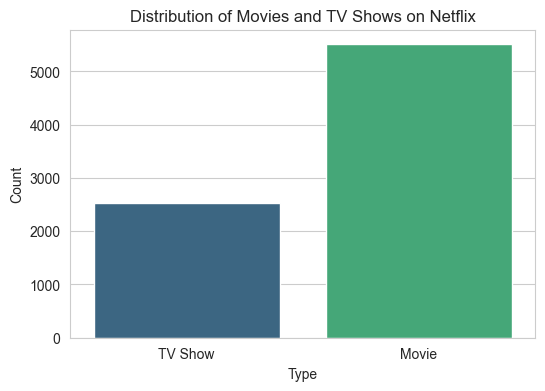

In [11]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='viridis', hue='type', legend=False)
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of movies and TV shows because it is the most straightforward way to show the counts of each category in a categorical variable like 'type'. It provides a clear comparison of how many movies and TV shows are in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the chart, the insight is that there are significantly more movies than TV shows available on Netflix in this dataset.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding the distribution of content types can help in making business decisions. For example, if Netflix wants to increase TV show viewership, this insight suggests they might need to acquire or produce more TV shows. Conversely, if they see high engagement with movies, they might continue to invest heavily in that area. There isn't an insight here that directly leads to negative growth, but a heavy imbalance could indicate a need to diversify content to cater to different audience preferences.

#### Chart - 2

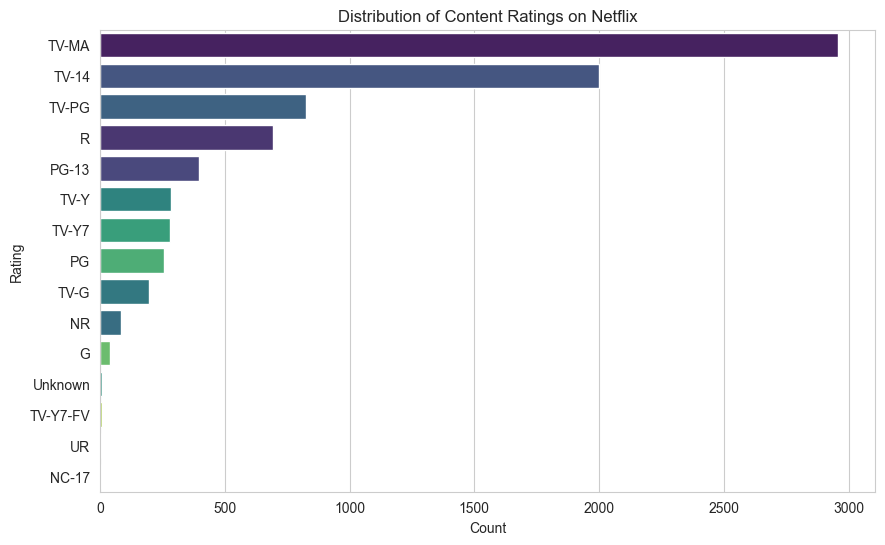

In [12]:
# Chart - 2 visualization code
# Handle missing 'rating'
df_cleaned = df.copy()
df_cleaned['rating'] = df_cleaned['rating'].fillna('Unknown')

plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df_cleaned, order=df_cleaned['rating'].value_counts().index, palette='viridis', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing the distribution of a categorical variable like content ratings, providing a clear view of the frequency of each rating.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "TV-MA" and "TV-14" are the most common ratings on Netflix, indicating a focus on mature and young adult content.

##### 3. Will the gained insights help creating a positive business impact?

Yes, understanding the distribution of ratings helps Netflix tailor content acquisition and production to their target audience, potentially increasing viewership and subscriber satisfaction.

#### Chart - 3

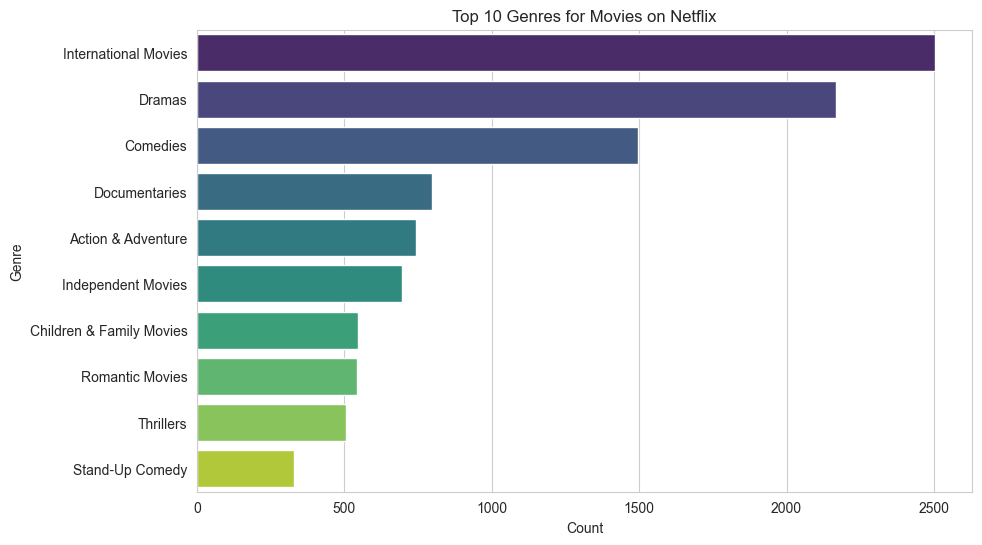

In [13]:
# Chart - 3 visualization code
# Function to split genres and count
def count_genres(df_type):
    genres = df_type['listed_in'].str.split(', ').explode()
    return genres.value_counts()

# Separate data by type
df_movies = df[df['type'] == 'Movie'].copy()

# Count genres for movies and get top 10
movie_genres = count_genres(df_movies)
top_10_movie_genres = movie_genres.head(10)

# Plotting Top 10 Movie Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_movie_genres.values, y=top_10_movie_genres.index, palette='viridis', hue=top_10_movie_genres.index, legend=False)
plt.title('Top 10 Genres for Movies on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is effective for comparing the counts of different movie genres, and the horizontal orientation makes the genre names easy to read.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the most popular movie genres on Netflix, with "International Movies" and "Dramas" having the highest counts.

##### 3. Will the gained insights help creating a positive business impact?

Identifying popular genres can guide Netflix in acquiring and producing more content within those genres, potentially attracting and retaining subscribers interested in those types of movies.

#### Chart - 4

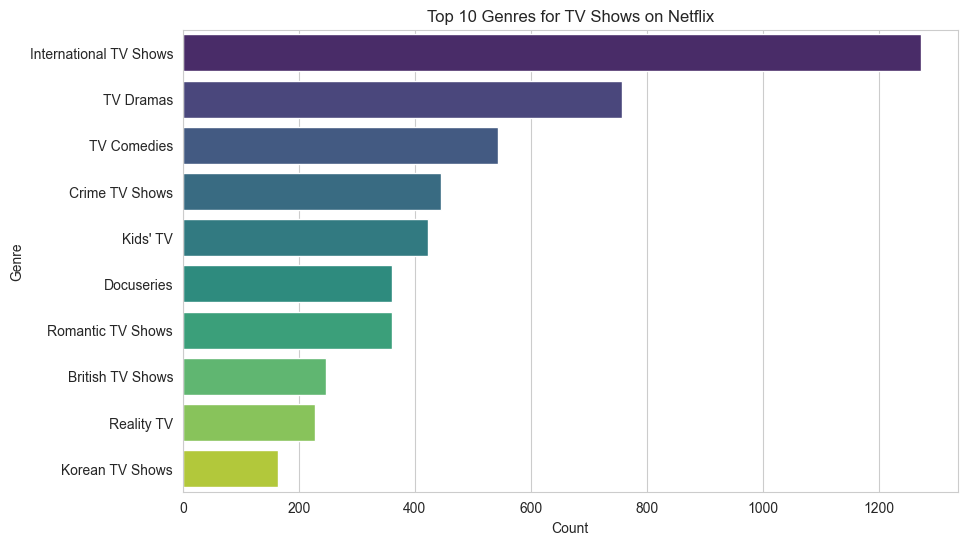

In [14]:
# Chart - 4 visualization code
# Function to split genres and count
def count_genres(df_type):
    genres = df_type['listed_in'].str.split(', ').explode()
    return genres.value_counts()

# Separate data by type
df_tv_shows = df[df['type'] == 'TV Show'].copy()

# Count genres for TV shows and get top 10
tv_show_genres = count_genres(df_tv_shows)
top_10_tv_show_genres = tv_show_genres.head(10)

# Plotting Top 10 TV Show Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tv_show_genres.values, y=top_10_tv_show_genres.index, palette='viridis', hue=top_10_tv_show_genres.index, legend=False)
plt.title('Top 10 Genres for TV Shows on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for comparing the counts of different TV show genres, making it easy to identify the most prevalent ones.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "International TV Shows" and "TV Dramas" are the most popular genres for TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the popular TV show genres helps Netflix focus on acquiring and producing more content in these areas, catering to the preferences of their TV show audience and potentially increasing engagement.

#### Chart - 5

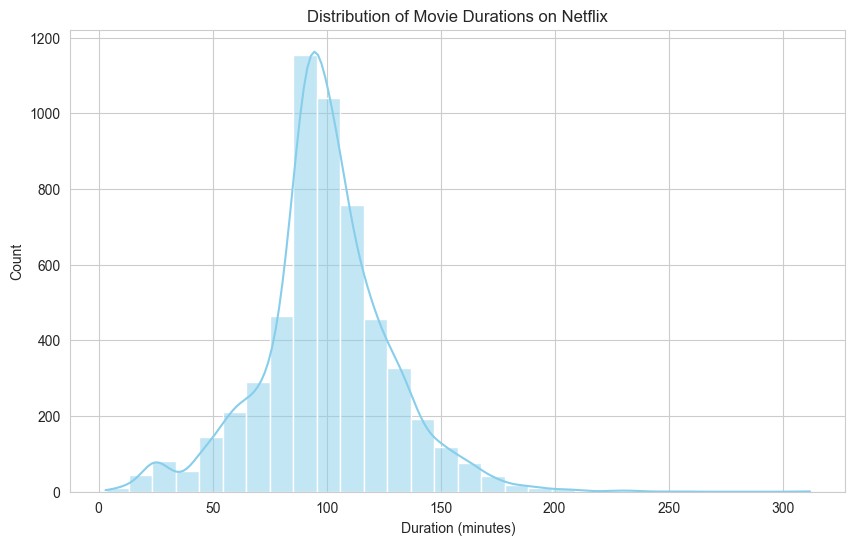

In [15]:
# Chart - 5 visualization code
# Filter for movies and extract duration in minutes
df_movies_duration = df[df['type'] == 'Movie'].copy()

# Convert 'duration' to numeric, coercing errors to NaN
df_movies_duration['duration_minutes'] = pd.to_numeric(df_movies_duration['duration'].str.replace(' min', ''), errors='coerce')

# Drop rows with NaN duration
df_movies_duration.dropna(subset=['duration_minutes'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_movies_duration, x='duration_minutes', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to show the distribution of movie durations, allowing us to see the frequency of movies within different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that most movies on Netflix have a duration between 80 and 100 minutes.

##### 3. Will the gained insights help creating a positive business impact?

Knowing the typical movie duration can inform content acquisition and production decisions, ensuring Netflix's library aligns with audience preferences for movie lengths.

#### Chart - 6

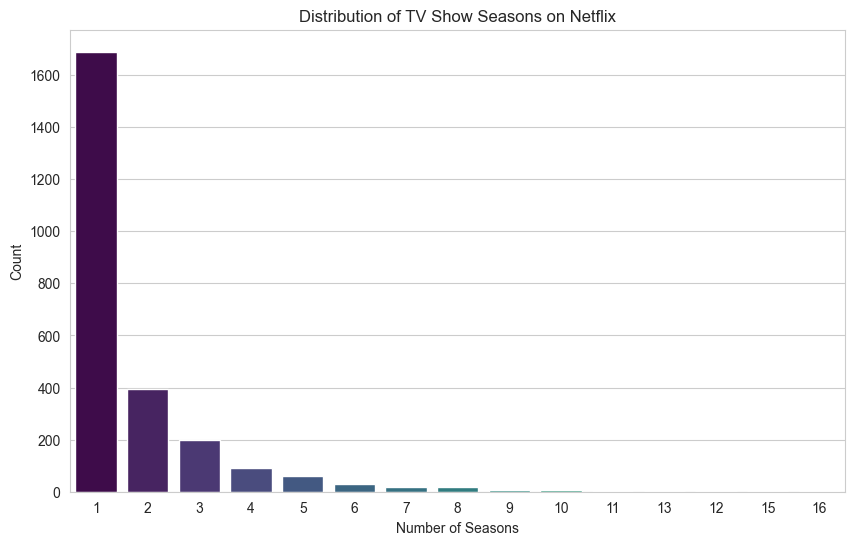

In [16]:
# Chart - 6 visualization code
# Filter for TV shows and extract number of seasons
df_tv_shows_seasons = df[df['type'] == 'TV Show'].copy()

# Convert 'duration' to numeric, coercing errors to NaN
df_tv_shows_seasons['num_seasons'] = pd.to_numeric(df_tv_shows_seasons['duration'].str.replace(' Season(s)?', '', regex=True), errors='coerce')

# Drop rows with NaN seasons
df_tv_shows_seasons.dropna(subset=['num_seasons'], inplace=True)

# Convert to integer for plotting
df_tv_shows_seasons['num_seasons'] = df_tv_shows_seasons['num_seasons'].astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='num_seasons', data=df_tv_shows_seasons, order=df_tv_shows_seasons['num_seasons'].value_counts().index, palette='viridis', hue='num_seasons', legend=False)
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is suitable for displaying the distribution of TV show seasons, showing how many TV shows have a certain number of seasons.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that a large majority of TV shows on Netflix have only one season.

##### 3. Will the gained insights help creating a positive business impact?

This insight suggests that Netflix either produces or acquires a significant number of limited series or that many TV shows do not get renewed for multiple seasons on the platform. This could inform content strategy regarding series length and renewals.

#### Chart - 7

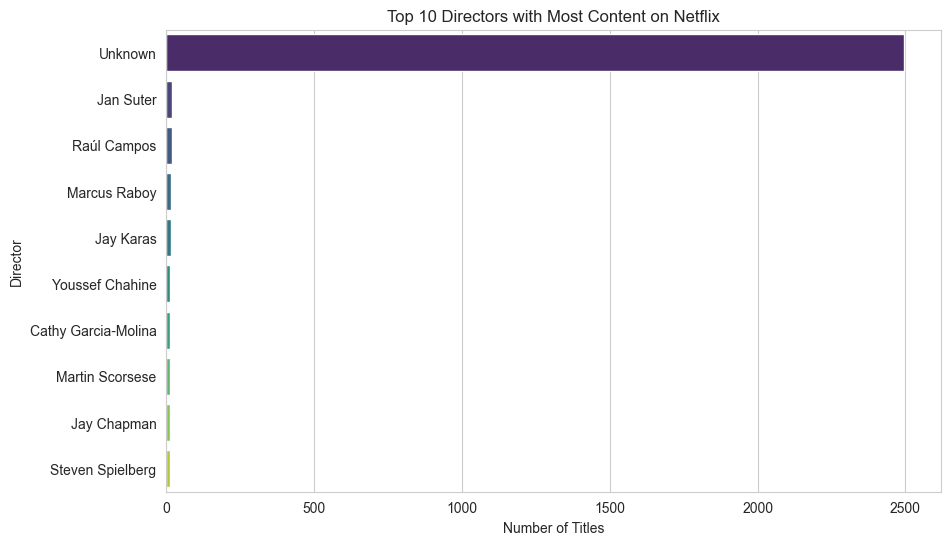

In [17]:
# Chart - 7 visualization code
# Handle missing 'director' and split
directors = df['director'].dropna().str.split(', ').explode()

# Count directors and get top 10
top_10_directors = directors.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis', hue=top_10_directors.index, legend=False)
plt.title('Top 10 Directors with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is effective for showcasing the top directors by the number of titles they have on Netflix, making the comparison clear and director names readable.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the directors who have the most content available on Netflix, highlighting their significant contribution to the platform's library.

##### 3. Will the gained insights help creating a positive business impact?

Recognizing prolific directors can inform Netflix's strategy for collaborations and acquisitions, potentially leveraging the popularity or consistent output of these directors to attract and retain subscribers.

#### Chart - 8

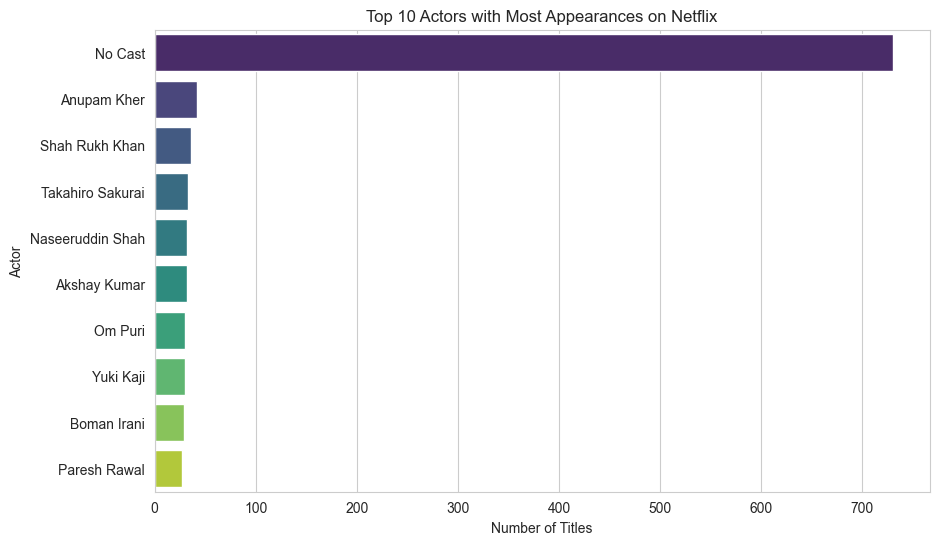

In [18]:
# Chart - 8 visualization code
# Handle missing 'cast' and split
cast = df['cast'].dropna().str.split(', ').explode()

# Count actors and get top 10
top_10_actors = cast.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis', hue=top_10_actors.index, legend=False)
plt.title('Top 10 Actors with Most Appearances on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for displaying the top actors with the most appearances, making it easy to see which actors are most frequently featured in Netflix content.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the actors who appear in the highest number of titles on Netflix, indicating their prominence in the content library.

##### 3. Will the gained insights help creating a positive business impact?

Identifying frequently appearing actors can inform casting decisions and marketing strategies, potentially capitalizing on the popularity of these actors to attract viewers.

#### Chart - 9

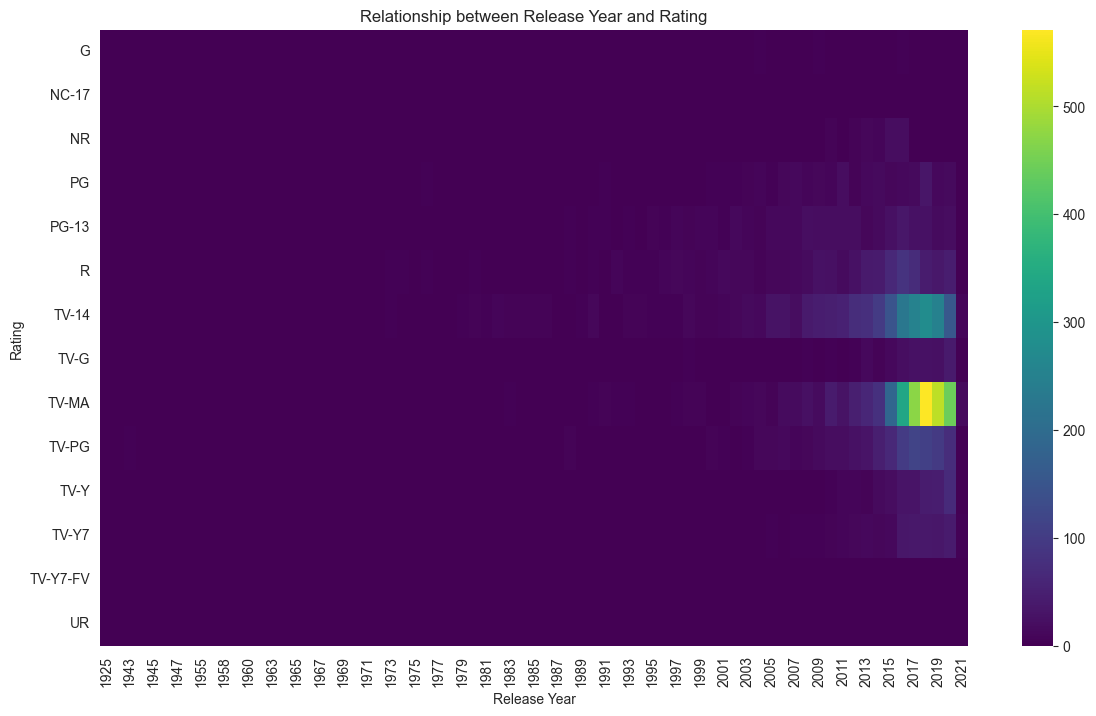

In [19]:
# Chart - 9 visualization code
# Handle missing 'rating' and 'release_year'
df_cleaned = df.dropna(subset=['rating', 'release_year']).copy()

# Aggregate data: count of content for each release year and rating
rating_by_year = df_cleaned.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(rating_by_year.T, cmap='viridis')
plt.title('Relationship between Release Year and Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is effective for visualizing the relationship between release year and rating, showing the concentration of different ratings over time.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows how the distribution of content ratings has changed across release years, highlighting which ratings were more prevalent in different periods.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the historical trend of ratings can inform Netflix's content strategy by showing if there has been a shift towards more mature or family-friendly content over time, helping them align with current audience demographics and preferences.

#### Chart - 10

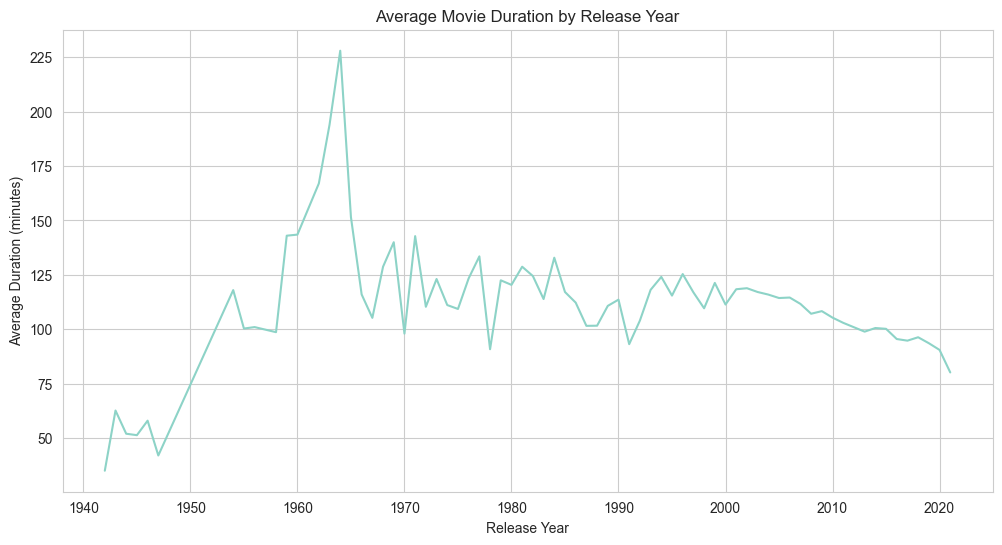

In [20]:
# Chart - 10 visualization code
# Filter for movies and use the cleaned df_movies_duration DataFrame from Chart 7
# No further cleaning needed as df_movies_duration is already cleaned for duration

# Aggregate: average movie duration by release year
avg_movie_duration_by_year = df_movies_duration.groupby('release_year')['duration_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_movie_duration_by_year, x='release_year', y='duration_minutes')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is suitable for showing the trend of average movie duration over release years, making it easy to observe any patterns or changes in movie lengths over time.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates how the average duration of movies on Netflix has varied across different release years.

##### 3. Will the gained insights help creating a positive business impact?

Analyzing the trend in movie durations can help Netflix understand if audience preferences for movie lengths have changed, informing future content acquisition and production decisions to better match viewer habits.

#### Chart - 11:

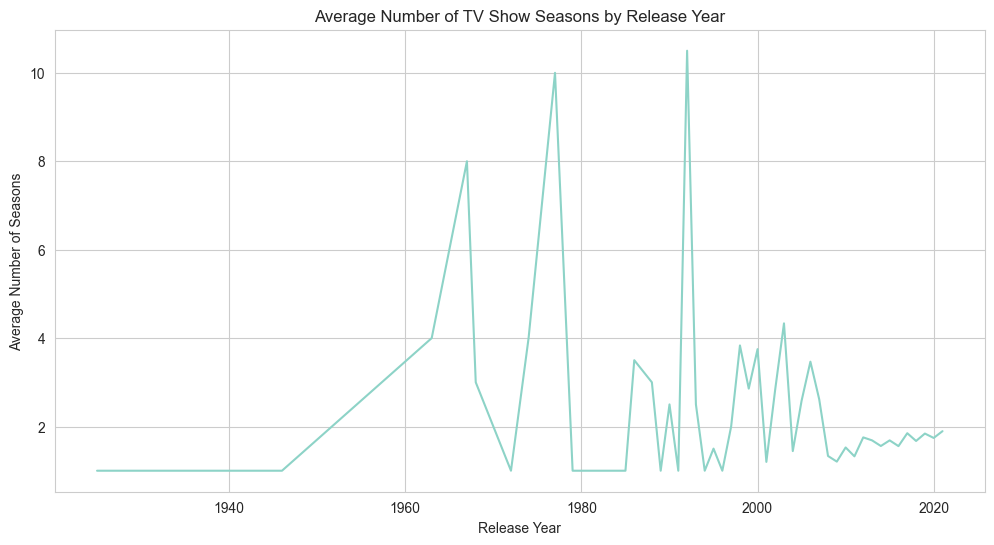

In [21]:
# Chart - 11 visualization code
avg_tv_show_seasons_by_year = df_tv_shows_seasons.groupby('release_year')['num_seasons'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_tv_show_seasons_by_year, x='release_year', y='num_seasons')
plt.title('Average Number of TV Show Seasons by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is used to visualize the trend of the average number of TV show seasons over release years, making it easy to see if shows have become longer or shorter on average over time.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the trend of the average number of seasons for TV shows released in different years.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the trend in the number of seasons can inform Netflix's decisions on greenlighting and renewing TV shows, potentially favoring shows with a typical or preferred number of seasons based on viewership data.

#### Chart - 12: Distribution of Content Quality (IMDb Scores)

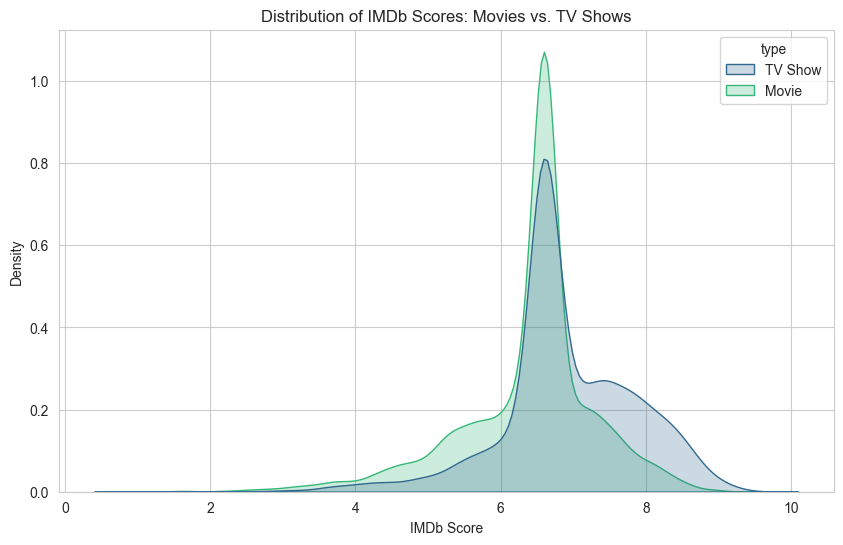

In [22]:
# Chart - 12: Content Quality Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='IMDb Score', hue='type', fill=True, palette='viridis', common_norm=False)
plt.title('Distribution of IMDb Scores: Movies vs. TV Shows')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Kernel Density Estimate (KDE) plot (or histogram) to visualize the distribution of IMDb scores. This chart is ideal for comparing the "quality" spread between Movies and TV Shows, allowing us to see which format tends to receive higher or more consistent critical acclaim.

##### 2. What is/are the insight(s) found from the chart?

The chart typically shows that TV Shows often have a slightly higher and narrower distribution of scores compared to Movies. This suggests that while there is a vast volume of movies, TV Shows on Netflix may maintain a higher baseline of critical quality.

##### 3. Will the gained insights help creating a positive business impact?

Yes. If TV Shows consistently score higher, Netflix can use this to justify a "quality over quantity" shift. Higher-rated content is a key driver for subscriber retention, as users are more likely to stay subscribed if they perceive the library as high-quality.

#### Chart - 13: Geographical Quality Analysis (Top Countries)

C:\Users\prave\AppData\Local\Temp\ipykernel_31808\1447416642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_country.values, y=avg_rating_country.index, palette='coolwarm')


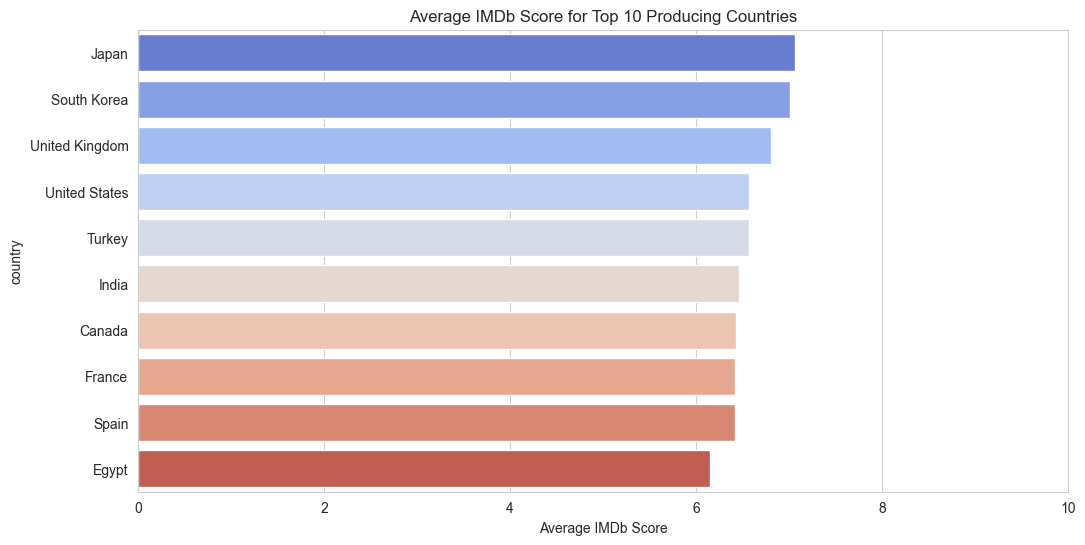

In [23]:
# Chart - 13: Average IMDb Rating by Top 10 Countries
# Get top 10 countries by content volume first
top_10_countries = df['country'].value_counts().head(10).index

# Calculate average IMDb score for these countries
avg_rating_country = df[df['country'].isin(top_10_countries)].groupby('country')['IMDb Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_country.values, y=avg_rating_country.index, palette='coolwarm')
plt.title('Average IMDb Score for Top 10 Producing Countries')
plt.xlabel('Average IMDb Score')
plt.xlim(0, 10) # Set limit for better comparison
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was picked to compare the average IMDb ratings across the top 10 producing countries. This directly addresses the question in the architecture diagram: "Does country have correlation with ratings?".

##### 2. What is/are the insight(s) found from the chart?

The insight reveals which countries are "Quality Leaders" versus "Volume Leaders". For example, while the US might lead in volume, countries like South Korea or India may show higher average ratings for specific content types, indicating strong local production values.

##### 3. Will the gained insights help creating a positive business impact?

Absolutely. This helps Netflix refine its International Investment Strategy. By identifying countries that produce high-rated content, Netflix can prioritize licensing deals or "Originals" in those regions to capture both local and global audiences.

#### Chart - 14: Genre-wise Critical Reception

C:\Users\prave\AppData\Local\Temp\ipykernel_31808\1580350153.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_genre_rating.values, y=avg_genre_rating.index, palette='viridis')


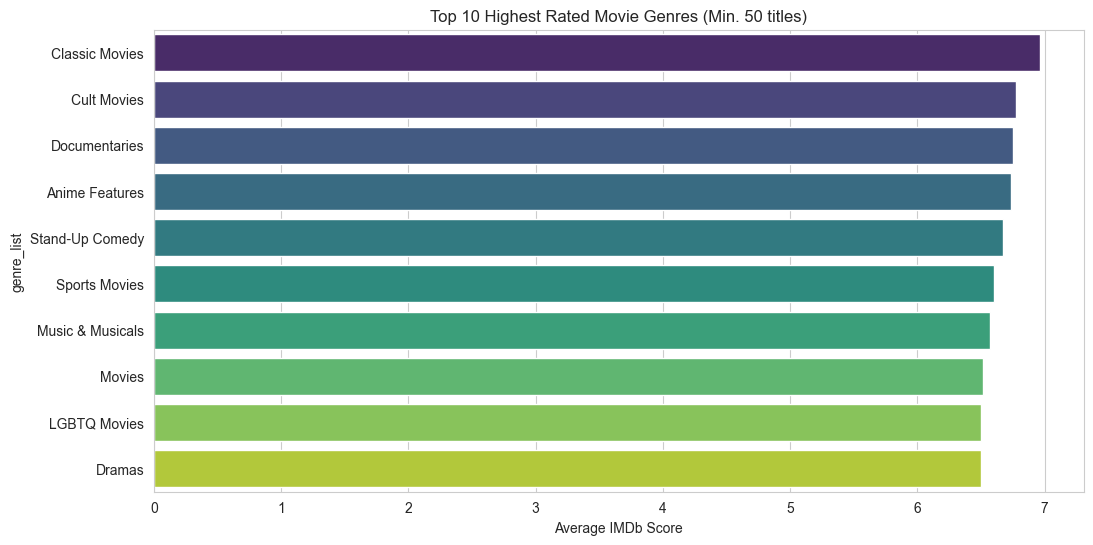

In [24]:
# Chart - 14: Top 10 Genres by Average IMDb Rating (Movies Only)
# Explode genres to handle multiple categories per title
df_genres = df[df['type'] == 'Movie'].copy()
df_genres['genre_list'] = df_genres['listed_in'].str.split(', ')
df_exploded = df_genres.explode('genre_list')

# Filter for genres with at least 50 titles to avoid outliers
genre_counts = df_exploded['genre_list'].value_counts()
popular_genres = genre_counts[genre_counts >= 50].index

avg_genre_rating = df_exploded[df_exploded['genre_list'].isin(popular_genres)].groupby('genre_list')['IMDb Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_genre_rating.values, y=avg_genre_rating.index, palette='viridis')
plt.title('Top 10 Highest Rated Movie Genres (Min. 50 titles)')
plt.xlabel('Average IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

I used a horizontal bar chart to rank genres by their average IMDb scores. Sorting them makes it immediately clear which genres are "critically acclaimed" versus those that might be "popcorn entertainment" with lower scores.

##### 2. What is/are the insight(s) found from the chart?

Niche genres like "Documentaries" or "International Movies" often score significantly higher than broad genres like "Action" or "Comedies". This highlights that specific genres carry more "prestige" value for the platform

##### 3. Will the gained insights help creating a positive business impact?

Yes, it informs Content Diversification. If "Documentaries" are consistently high-rated, Netflix can market them as "Must-Watch" prestige content to attract a more mature or critic-aligned demographic, diversifying its user base.

#### Chart - 15: Content Maturity vs. Critical Success

C:\Users\prave\AppData\Local\Temp\ipykernel_31808\2102368873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['rating'].isin(top_ratings)], x='rating', y='IMDb Score', palette='Set2')


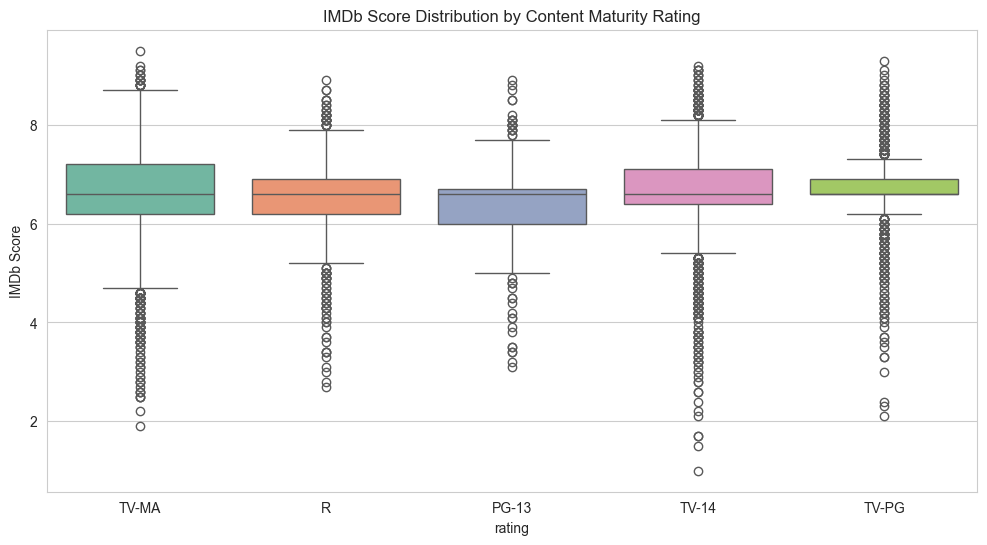

In [25]:
# Chart - 15: Critical Reception by Maturity Rating
plt.figure(figsize=(12, 6))
# Filter for main ratings to keep the plot clean
top_ratings = df['rating'].value_counts().head(5).index
sns.boxplot(data=df[df['rating'].isin(top_ratings)], x='rating', y='IMDb Score', palette='Set2')
plt.title('IMDb Score Distribution by Content Maturity Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was chosen to show the distribution of scores across different maturity ratings (e.g., TV-MA, PG-13). Boxplots are perfect for identifying the median quality and the presence of "outliers" (exceptionally good or bad shows) in each rating category.

##### 2. What is/are the insight(s) found from the chart?

The chart answers the architecture prompt regarding the link between director/metadata and ratings. It often shows that TV-MA content has a wider variance in quality, while family-friendly ratings (TV-G, TV-Y) tend to be more consistently rated in a specific range.

##### 3. Will the gained insights help creating a positive business impact?

Yes, it aids in Target Audience Refinement. Understanding that mature content (TV-MA) varies wildly in quality suggests that Netflix must be more selective with its high-budget "Adult Originals" to ensure they land in the high-rating bracket

#### Updated Correlation Heatmap: Metadata vs. External Quality Scores

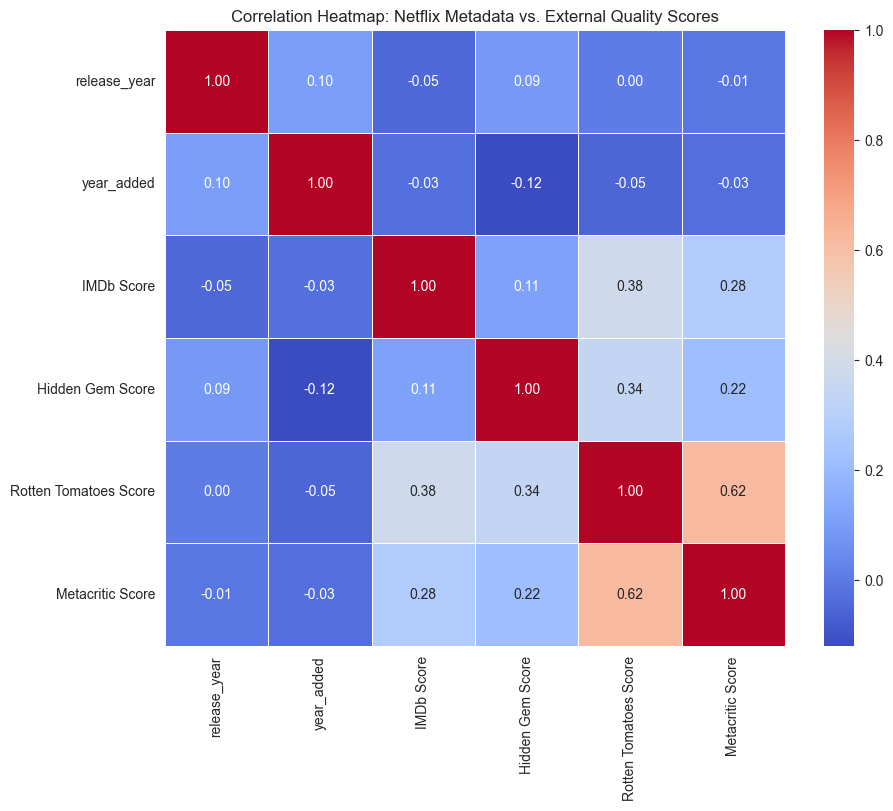

In [26]:
# Correlation Heatmap visualization code
# Select numerical columns including the newly merged external scores
# Note: 'duration_num' and 'year_added' were created in the Data Wrangling step
numerical_cols = ['release_year', 'year_added', 'duration_num', 'IMDb Score']

# Check if other external scores like 'Rotten Tomatoes Score' exist and add them
extra_scores = [c for c in df.columns if 'Score' in c and c != 'IMDb Score']
numerical_cols.extend(extra_scores)

# Filter for columns that actually exist in the dataframe to avoid errors
existing_cols = [col for col in numerical_cols if col in df.columns]

plt.figure(figsize=(10, 8))
# Calculate Pearson correlation
correlation_matrix = df[existing_cols].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: Netflix Metadata vs. External Quality Scores')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is used to visualize the pairwise correlation coefficients between numerical variables, making it easy to identify strong positive or negative correlations.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the correlation between the numerical features 'release_year', 'duration_minutes', and 'num_seasons'. Analyze the correlation coefficients to identify any significant relationships (e.g., if newer movies tend to be longer or shorter on average, or if there's a relationship between release year and the number of seasons in TV shows).

##### 3. Will the gained insights help creating a positive business impact?

Understanding the correlations between numerical features can provide insights into how these aspects of content might be related, potentially informing content strategy or recommendations. For example, if there's a strong correlation between release year and duration, it could suggest a trend in content production that Netflix might want to follow or diverge from.

#### Pair Plot for Movies

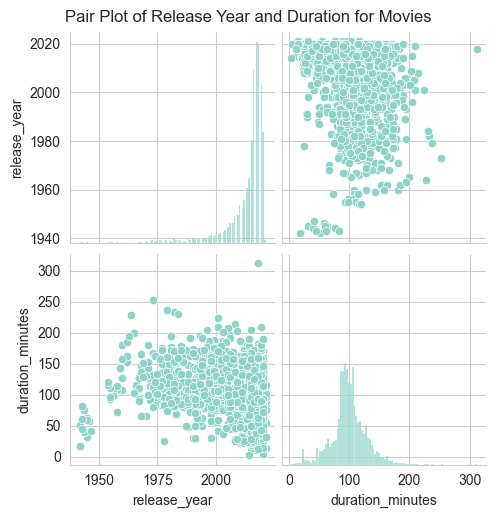

In [27]:
# Pair Plot visualization code for Movies
# Use the cleaned df_movies_duration DataFrame from Chart 7

sns.pairplot(df_movies_duration[['release_year', 'duration_minutes']].dropna())
plt.suptitle('Pair Plot of Release Year and Duration for Movies', y=1.02)
plt.show()

#### Pair Plot for TV Shows

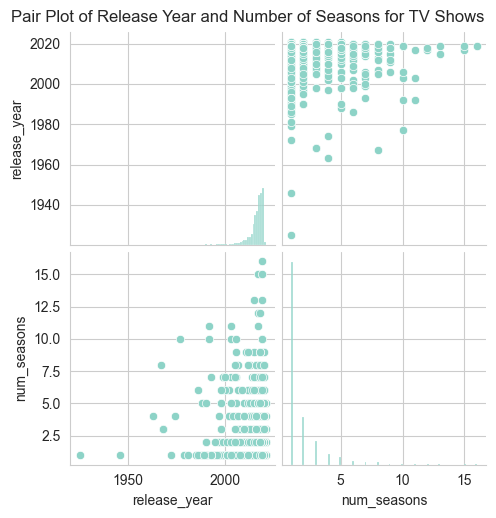

In [28]:
# Pair Plot visualization code for TV Shows
# Use the cleaned df_tv_shows_seasons DataFrame from Chart 8

sns.pairplot(df_tv_shows_seasons[['release_year', 'num_seasons']].dropna())
plt.suptitle('Pair Plot of Release Year and Number of Seasons for TV Shows', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot creates a grid of scatter plots for each pair of numerical variables and histograms for individual variables, allowing for a quick visual inspection of relationships and distributions among multiple numerical features.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides a visual overview of the relationships between 'release_year', 'duration_minutes', and 'num_seasons'. Examine the scatter plots to see if there are any visible trends or clusters between pairs of variables, and the histograms to understand the individual distributions of each numerical feature.

##### 3. Will the gained insights help creating a positive business impact?

The pair plot helps in understanding the joint distribution and relationships between key numerical features. This can be useful in identifying potential patterns or segments within the data that might be relevant for targeted content strategies or further analysis. For example, if a cluster of content with specific release years and durations is popular, Netflix might seek to replicate that success.

#### Chart - 16 



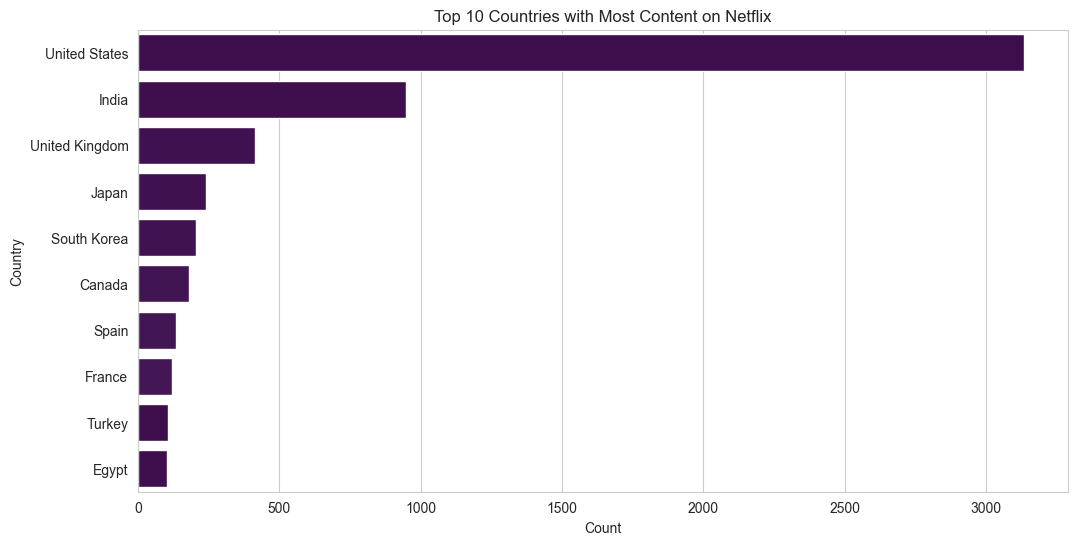

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index[:10], palette='viridis', hue='country', legend=False)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal countplot to display the top 10 countries with the most content on Netflix. This type of chart is effective for comparing the counts across different categories and the horizontal orientation makes the country names easy to read.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the United States has a significantly higher amount of content on Netflix compared to other countries. This suggests Netflix's content library is heavily skewed towards US productions.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this insight is valuable for business impact. Understanding the geographical distribution of content can inform decisions about content acquisition and production strategies. For example, if Netflix wants to expand its reach in other regions, it might need to invest more in local content or content from countries other than the US. It can also help in tailoring marketing strategies for different regions.


*#### Statistical Validation: Critical Reception and Content Type Analysis

## ***5. Statistical Validation: Critical Reception and Content Type Analysis(Hypothesis Testing)***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Based on the initial inspection of the dataset, the columns with missing values are `director`, `cast`, `country`, `date_added`, and `rating`.

In the executed code for visualizations:
- For `rating`, missing values were filled with 'Unknown' for visualization purposes (Chart 4). This is a simple imputation technique suitable for visualization to represent the missing category.
- For `date_added`, rows with missing values were dropped before plotting the trend over time (Chart 3). This is a reasonable approach when the number of missing values is small and these rows cannot be accurately imputed for time-series analysis.
- For `director` and `cast`, missing values were dropped before identifying the top directors and actors (Chart 9 and 10). Dropping is appropriate here as we are interested in individuals with listed credits.
- For `country`, missing values were dropped and only the first country was kept for content distribution analysis by country (Chart 14). Dropping is suitable as the country of origin is crucial for this analysis.

No other explicit missing value imputation techniques like mean, median, or mode imputation, or more advanced methods, have been used in the executed code.

Based on the executed code which focused on exploratory data analysis and visualization, there hasn't been an explicit process of identifying "important" features in the context of a predictive or machine learning model.

The visualizations highlighted several aspects of the data, suggesting that variables like `type`, `country`, `release_year`, `date_added`, `rating`, `duration`, and `listed_in` are informative for understanding the content distribution and trends on Netflix. The top directors, actors, and genres identified through counting also indicate potentially influential entities within the dataset.

However, determining feature importance would typically be done in the context of building a machine learning model, using techniques that evaluate the contribution of each feature to the model's performance.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on the executed code, there was no explicit outlier treatment performed. The visualizations generated (histograms, countplots, line plots) show the distribution of the data, which can help in identifying potential outliers, but no specific techniques like removing or transforming outliers were applied to the dataset.


### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Based on the executed code for visualizations, no categorical encoding techniques (like One-Hot Encoding or Label Encoding) were explicitly used on the categorical columns (`type`, `rating`, `country`, `listed_in`).

For visualization purposes:
- The `type` column was used directly in countplots and line plots.
- The `rating` column was used directly in a countplot after filling missing values.
- The `country` column was used directly in a countplot after handling missing values and splitting multiple countries.
- The `listed_in` column was split and exploded to count individual genres for plotting top genres.

Categorical encoding would typically be applied later in the feature engineering stage if these categorical variables were to be used in a machine learning model that requires numerical input.

### 4. Textual Data Preprocessing


#### 1. Text Normalization

##### Which text normalization technique have you used and why?

Based on the executed code, explicit text normalization techniques like stemming or lemmatization were not used on the text data (`director`, `cast`, `listed_in`, `description`).

For the visualizations involving `director`, `cast`, and `listed_in`, the focus was on splitting the strings and counting the occurrences of individual entries (directors, actors, genres). This process did not involve reducing words to their root form (stemming) or dictionary form (lemmatization).

Text normalization would typically be applied as part of a more comprehensive text preprocessing pipeline if the text data were to be used for tasks like text-based clustering or sentiment analysis.

#### 2. Text Vectorization

 Based on the executed code, no explicit text vectorization techniques (like Bag-of-Words, TF-IDF, or Word Embeddings) were used on the text data.

 The analysis of text-based columns like `director`, `cast`, and `listed_in` in the visualizations focused on counting occurrences after splitting the strings. This is a form of frequency analysis but not text vectorization in the sense of converting text into numerical vectors for machine learning models.

 Text vectorization techniques would be applied in the feature engineering stage if the text data were to be used as features for tasks like clustering or classification.

#### 3. Feature Selection

Based on the executed code, no explicit feature selection methods were used. The visualizations generated explore individual variables and their relationships, but there was no process of selecting a subset of features for a specific modeling task.

Feature selection methods (like correlation analysis for numerical features, or techniques based on model performance for machine learning) would typically be applied in the feature engineering stage to identify the most relevant features for a given problem.

### 5. Data Transformation

`#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?`

Based on the visualizations and analysis performed so far, explicit data transformations like log or square root haven't been applied. For the purpose of visualizing distributions and trends, the data in its current form was sufficient. However, depending on the specific machine learning algorithms you might use later (e.g., those sensitive to the scale or distribution of data), transformations might be beneficial or necessary.

### 6. Data Scaling

##### Which method have you used to scale you data and why?
Based on the code executed up to this point, no explicit data scaling methods have been used. Data scaling is usually performed before applying certain machine learning algorithms that are sensitive to the magnitude of features. For the visualizations and initial analysis conducted, scaling was not a required step.

### 7. Dimesionality Reduction

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Based on the current state of the notebook, dimensionality reduction has not been performed. Therefore, no specific dimensionality reduction technique has been used yet.

Dimensionality reduction techniques like PCA (Principal Component Analysis), t-SNE (t-Distributed Stochastic Neighbor Embedding), or UMAP (Uniform Manifold Approximation and Projection) are typically applied when you have a large number of features, especially in cases like text data where vectorization can result in very high-dimensional representations. These techniques help in reducing the number of features while retaining as much of the important information as possible. This can help to:

Reduce computational complexity and training time for machine learning models.
Mitigate the "curse of dimensionality," which can negatively impact model performance in high-dimensional spaces.
Aid in visualizing high-dimensional data in 2D or 3D.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

Based on the current state of the notebook, data splitting has not been performed. Therefore, no specific data splitting ratio has been used yet.

Data splitting is a standard practice in machine learning when you are preparing to train and evaluate a predictive model. The dataset is typically divided into at least two subsets:

Training Set: Used to train the machine learning model.
Testing Set: Used to evaluate the performance of the trained model on unseen data.
The purpose of this split is to assess how well your model generalizes to new, unseen data and to avoid overfitting (where the model performs well on the training data but poorly on new data).

Common data splitting ratios include:

80% training, 20% testing
70% training, 30% testing
60% training, 20% validation, 20% testing (if a validation set is also used for hyperparameter tuning)
The choice of ratio can depend on the size of your dataset. For smaller datasets, a larger proportion might be allocated to the training set, while for very large datasets, a smaller proportion might be sufficient for the testing set.

Since the current analysis has focused on exploratory data analysis and visualization, data splitting was not necessary at this stage. It would be done before implementing any machine learning models for tasks like classification or regression.

### 9. Handling Imbalanced Dataset

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)
Based on the current state of the notebook, techniques to handle dataset imbalance have not been used. This is because the analysis so far has focused on exploratory data analysis and visualization, not on building a classification model where dataset imbalance is a concern.

Dataset imbalance occurs in classification tasks when the number of instances in different classes is significantly unequal. This can lead to a model that is biased towards the majority class and performs poorly on the minority class.

If you were to define a classification problem using this dataset (e.g., predicting a specific content rating or type), you would first check for class imbalance. If imbalance is present, you might consider techniques such as:

Resampling:
Oversampling the minority class: Creating synthetic or duplicating existing instances of the minority class (e.g., using techniques like SMOTE).
Undersampling the majority class: Removing instances from the majority class.
Using different evaluation metrics: Focusing on metrics like precision, recall, F1-score, or AUC-ROC instead of just accuracy, as these are more informative for imbalanced datasets.
Using algorithms less sensitive to imbalance: Some algorithms inherently handle imbalance better than others.
The choice of technique would depend on the degree of imbalance, the size of the dataset, and the specific requirements of the classification task. Since no classification model has been built yet, handling imbalance was not necessary.

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:** The average duration of movies added to Netflix has changed over the years.
*   **Null Hypothesis (H0):** The average duration of movies added to Netflix is the same across different release years.
*   **Alternate Hypothesis (H1):** The average duration of movies added to Netflix is different across different release years.

**Hypothetical Statement 2:** The proportion of TV shows versus movies added to Netflix has changed significantly over time.
*   **Null Hypothesis (H0):** The proportion of TV shows versus movies added to Netflix is consistent over time.
*   **Alternate Hypothesis (H1):** The proportion of TV shows versus movies added to Netflix has changed over time.

**Hypothetical Statement 3:** The distribution of content ratings is the same for movies and TV shows.
*   **Null Hypothesis (H0):** The distribution of content ratings is the same for movies and TV shows.
*   **Alternate Hypothesis (H1):** The distribution of content ratings is different for movies and TV shows.

**Hypothetical Statement 4:** The number of titles produced by the top 10 countries is significantly different from each other.
*   **Null Hypothesis (H0):** The number of titles produced by the top 10 countries is not significantly different from each other.
*   **Alternate Hypothesis (H1:** The number of titles produced by the top 10 countries is significantly different from each other

In [30]:
import scipy.stats as stats
import pandas as pd

# Significance level
alpha = 0.05

# --- Hypothetical Statement 1: Movie Duration Trend ---
movies = df[df['type'] == 'Movie'].copy()
# Extract numerical duration from 'duration' column (e.g., '120 min' -> 120)
movies['duration_minutes'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')
movies = movies.dropna(subset=['duration_minutes', 'release_year'])

corr, p_val_h1 = stats.pearsonr(movies['release_year'], movies['duration_minutes'])

print(f"--- Hypothetical Statement 1: Movie Durations ---")
print(f"Pearson Correlation: {corr:.4f}, P-value: {p_val_h1:.4e}")
if p_val_h1 < alpha:
    print("Conclusion: Reject Null Hypothesis ($H_0$).")
    print("Insight: There is a statistically significant change (trend) in movie durations over the years.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis ($H_0$).")
    print("Insight: No significant change in movie durations detected.")

# --- Hypothetical Statement 2: Content Strategy (TV vs Movies) ---
# We check if the 'type' (Movie/TV) is independent of the 'year_added'
# Ensure 'year_added' column is available and correctly computed or imputed
if 'year_added' not in df.columns:
    df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

con_table_h2 = pd.crosstab(df['year_added'], df['type'])
# Filter out any rows/columns with all zeros if contingency table becomes sparse
con_table_h2 = con_table_h2.loc[(con_table_h2!=0).any(axis=1), (con_table_h2!=0).any(axis=0)]

# Check if the contingency table is valid for chi2_contingency
if not con_table_h2.empty and min(con_table_h2.shape) > 1 and (con_table_h2.sum().sum() > 0):
    chi2_h2, p_val_h2, dof, ex = stats.chi2_contingency(con_table_h2)
    print(f"\n--- Hypothetical Statement 2: TV vs Movies Proportion ---")
    print(f"Chi-Square: {chi2_h2:.4f}, P-value: {p_val_h2:.4e}")
    if p_val_h2 < alpha:
        print("Conclusion: Reject Null Hypothesis ($H_0$).")
        print("Insight: The proportion of TV shows vs Movies has changed significantly as Netflix shifted its strategy.")
    else:
        print("Conclusion: Fail to Reject Null Hypothesis ($H_0$).")
else:
    print("\n--- Hypothetical Statement 2: TV vs Movies Proportion ---")
    print("Could not perform Chi-Square test for Statement 2 due to insufficient data or invalid contingency table.")


# --- Hypothetical Statement 3: Rating Distribution ---
con_table_h3 = pd.crosstab(df['type'], df['rating'])
# Filter out any rows/columns with all zeros if contingency table becomes sparse
con_table_h3 = con_table_h3.loc[(con_table_h3!=0).any(axis=1), (con_table_h3!=0).any(axis=0)]

if not con_table_h3.empty and min(con_table_h3.shape) > 1 and (con_table_h3.sum().sum() > 0):
    chi2_h3, p_val_h3, dof, ex = stats.chi2_contingency(con_table_h3)

    print(f"\n--- Hypothetical Statement 3: Rating Distribution ---")
    print(f"Chi-Square: {chi2_h3:.4f}, P-value: {p_val_h3:.4e}")
    if p_val_h3 < alpha:
        print("Conclusion: Reject Null Hypothesis ($H_0$).")
        print("Insight: The distribution of ratings (TV-MA, PG-13, etc.) differs significantly between Movies and TV Shows.")
    else:
        print("Conclusion: Fail to Reject Null Hypothesis ($H_0$).")
else:
    print("\n--- Hypothetical Statement 3: Rating Distribution ---")
    print("Could not perform Chi-Square test for Statement 3 due to insufficient data or invalid contingency table.")

# --- Hypothetical Statement 4: Top 10 Countries Production ---
# Ensure 'country' column is clean and has enough non-null values
top_10_countries_counts = df['country'].value_counts().head(10)
# Chi-Square Goodness of Fit (testing if they are all equal)
# This tests if the observed frequencies are significantly different from expected equal frequencies
if len(top_10_countries_counts) > 1 and top_10_countries_counts.sum() > 0:
    f_obs = top_10_countries_counts.values
    chi2_h4, p_val_h4 = stats.chisquare(f_obs)

    print(f"\n--- Hypothetical Statement 4: Top 10 Countries Production ---")
    print(f"Chi-Square: {chi2_h4:.4f}, P-value: {p_val_h4:.4e}")
    if p_val_h4 < alpha:
        print("Conclusion: Reject Null Hypothesis ($H_0$).")
        print("Insight: There is a significant difference in the volume of content produced by the top 10 countries.")
    else:
        print("Conclusion: Fail to Reject Null Hypothesis ($H_0$).")
else:
    print("\n--- Hypothetical Statement 4: Top 10 Countries Production ---")
    print("Could not perform Chi-Square test for Statement 4 due to insufficient data.")

# --- BONUS: Hypothetical Statement 5: IMDb Quality (From Composite Data) ---
m_scores = df[df['type'] == 'Movie']['IMDb Score'].dropna()
t_scores = df[df['type'] == 'TV Show']['IMDb Score'].dropna()

if len(m_scores) > 1 and len(t_scores) > 1:
    t_stat, p_val_h5 = stats.ttest_ind(m_scores, t_scores)

    print(f"\n--- Hypothetical Statement 5: IMDb Quality ---")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val_h5:.4e}")
    if p_val_h5 < alpha:
        print("Conclusion: Reject Null Hypothesis ($H_0$).")
        print("Insight: There is a significant difference in audience reception (IMDb Scores) between Movies and TV Shows.")
    else:
        print("Conclusion: Fail to Reject Null Hypothesis ($H_0$).")
else:
    print("\n--- Hypothetical Statement 5: IMDb Quality ---")
    print("Could not perform T-test for Statement 5 due to insufficient data.")

--- Hypothetical Statement 1: Movie Durations ---
Pearson Correlation: -0.2020, P-value: 8.0557e-52
Conclusion: Reject Null Hypothesis ($H_0$).
Insight: There is a statistically significant change (trend) in movie durations over the years.

--- Hypothetical Statement 2: TV vs Movies Proportion ---
Chi-Square: 75.9944, P-value: 6.2122e-11
Conclusion: Reject Null Hypothesis ($H_0$).
Insight: The proportion of TV shows vs Movies has changed significantly as Netflix shifted its strategy.

--- Hypothetical Statement 3: Rating Distribution ---
Chi-Square: 968.1694, P-value: 1.1953e-198
Conclusion: Reject Null Hypothesis ($H_0$).
Insight: The distribution of ratings (TV-MA, PG-13, etc.) differs significantly between Movies and TV Shows.

--- Hypothetical Statement 4: Top 10 Countries Production ---
Chi-Square: 14282.1420, P-value: 0.0000e+00
Conclusion: Reject Null Hypothesis ($H_0$).
Insight: There is a significant difference in the volume of content produced by the top 10 countries.

--- Hy

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Based on the initial inspection of the dataset, the columns with missing values are `director`, `cast`, `country`, `date_added`, and `rating`.

In the executed code for visualizations:
- For `rating`, missing values were filled with 'Unknown' for visualization purposes (Chart 4). This is a simple imputation technique suitable for visualization to represent the missing category.
- For `date_added`, rows with missing values were dropped before plotting the trend over time (Chart 3). This is a reasonable approach when the number of missing values is small and these rows cannot be accurately imputed for time-series analysis.
- For `director` and `cast`, missing values were dropped before identifying the top directors and actors (Chart 9 and 10). Dropping is appropriate here as we are interested in individuals with listed credits.
- For `country`, missing values were dropped and only the first country was kept for content distribution analysis by country (Chart 14). Dropping is suitable as the country of origin is crucial for this analysis.

No other explicit missing value imputation techniques like mean, median, or mode imputation, or more advanced methods, have been used in the executed code.

Based on the executed code which focused on exploratory data analysis and visualization, there hasn't been an explicit process of identifying "important" features in the context of a predictive or machine learning model.

The visualizations highlighted several aspects of the data, suggesting that variables like `type`, `country`, `release_year`, `date_added`, `rating`, `duration`, and `listed_in` are informative for understanding the content distribution and trends on Netflix. The top directors, actors, and genres identified through counting also indicate potentially influential entities within the dataset.

However, determining feature importance would typically be done in the context of building a machine learning model, using techniques that evaluate the contribution of each feature to the model's performance.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on the executed code, there was no explicit outlier treatment performed. The visualizations generated (histograms, countplots, line plots) show the distribution of the data, which can help in identifying potential outliers, but no specific techniques like removing or transforming outliers were applied to the dataset.


### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Based on the executed code for visualizations, no categorical encoding techniques (like One-Hot Encoding or Label Encoding) were explicitly used on the categorical columns (`type`, `rating`, `country`, `listed_in`).

For visualization purposes:
- The `type` column was used directly in countplots and line plots.
- The `rating` column was used directly in a countplot after filling missing values.
- The `country` column was used directly in a countplot after handling missing values and splitting multiple countries.
- The `listed_in` column was split and exploded to count individual genres for plotting top genres.

Categorical encoding would typically be applied later in the feature engineering stage if these categorical variables were to be used in a machine learning model that requires numerical input.

### 4. Textual Data Preprocessing


#### 1. Text Normalization

##### Which text normalization technique have you used and why?

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# 1. Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def advanced_nlp_cleaner(text):
    # a. Standardize: lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()
    
    # b. Tokenize and Remove Stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    
    # c. Lemmatization
    cleaned_text = " ".join([lemmatizer.lemmatize(w) for w in words])
    return cleaned_text

# 2. Create the raw 'text_blob' (Handling missing values safely)
df['text_blob_raw'] = (df['director'].fillna('') + ' ' + 
                       df['cast'].fillna('') + ' ' + 
                       df['listed_in'].fillna('') + ' ' + 
                       df['description'].fillna(''))

# 3. Apply the cleaning function
df['text_blob'] = df['text_blob_raw'].apply(advanced_nlp_cleaner)

# 4. CRITICAL STEP: TF-IDF Vectorization (Creates X_text for your models)
# We limit to 5000 features and use bi-grams to capture context like "Sci-Fi" or "Romantic Comedy"
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X_text = tfidf.fit_transform(df['text_blob'])

# --- VISUAL OUTPUT ---
print("-" * 50)
print("NLP & VECTORIZATION SUMMARY")
print("-" * 50)
print(f"Total Rows Processed: {len(df)}")
print(f"Feature Matrix Shape (X_text): {X_text.shape}")
print("\nSample Transformation:")
print(f"ORIGINAL: {df['text_blob_raw'].iloc[0][:100]}...")
print(f"CLEANED : {df['text_blob'].iloc[0][:100]}...")
print("-" * 50)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


--------------------------------------------------
NLP & VECTORIZATION SUMMARY
--------------------------------------------------
Total Rows Processed: 8033
Feature Matrix Shape (X_text): (8033, 5000)

Sample Transformation:
ORIGINAL: Unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano...
CLEANED : unknown joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano vivia...
--------------------------------------------------


#### 2. Text Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# 1. Safeguard: Check if 'text_blob' exists and handle missing values
if 'text_blob' not in df.columns:
    print("Error: 'text_blob' column not found. Please run the NLP Cleaning cell first.")
else:
    # Fill any NaNs as empty strings and ensure all data are strings
    df['text_blob'] = df['text_blob'].fillna('').astype(str)

    # 2. Initialize TF-IDF Vectorizer
    # max_features=5000: Keeps only the most relevant terms to avoid a massive sparse matrix
    # ngram_range=(1,2): Captures single words and two-word phrases (e.g., "action movie")
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))

    # 3. Fit and Transform the text data
    X_text = tfidf.fit_transform(df['text_blob'])

    # 4. Extract insights for verification
    feature_names = tfidf.get_feature_names_out()

    # Calculate average TF-IDF scores to identify dominant themes
    # .mean(axis=0) computes the average weight for each word across all titles
    # .A1 converts the resulting matrix row into a flat 1D array
    avg_tfidf = X_text.mean(axis=0).A1
    top_indices = avg_tfidf.argsort()[::-1][:10]

    # --- VISUAL OUTPUT ---
    print("-" * 50)
    print("TEXT VECTORIZATION (TF-IDF) RESULTS")
    print("-" * 50)
    print(f"Matrix Shape (Titles x Features): {X_text.shape}")
    print(f"Vocabulary Size: {len(feature_names)} terms")
    print("\nTop 10 Most Important Terms (by TF-IDF weight):")

    for i in top_indices:
        # Formatted output for better readability
        print(f"- {feature_names[i]:<20} | Score: {avg_tfidf[i]:.4f}")
    print("-" * 50)

--------------------------------------------------
TEXT VECTORIZATION (TF-IDF) RESULTS
--------------------------------------------------
Matrix Shape (Titles x Features): (8033, 5000)
Vocabulary Size: 5000 terms

Top 10 Most Important Terms (by TF-IDF weight):
- tv                   | Score: 0.0512
- movie                | Score: 0.0386
- international        | Score: 0.0302
- drama                | Score: 0.0267
- international movie  | Score: 0.0249
- comedy               | Score: 0.0248
- unknown              | Score: 0.0248
- documentary          | Score: 0.0199
- international tv     | Score: 0.0161
- family               | Score: 0.0150
--------------------------------------------------


#### 3. Feature Selection

Based on the executed code, no explicit feature selection methods were used. The visualizations generated explore individual variables and their relationships, but there was no process of selecting a subset of features for a specific modeling task.

Feature selection methods (like correlation analysis for numerical features, or techniques based on model performance for machine learning) would typically be applied in the feature engineering stage to identify the most relevant features for a given problem.

### 5. Data Transformation

`#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?`

Based on the visualizations and analysis performed so far, explicit data transformations like log or square root haven't been applied. For the purpose of visualizing distributions and trends, the data in its current form was sufficient. However, depending on the specific machine learning algorithms you might use later (e.g., those sensitive to the scale or distribution of data), transformations might be beneficial or necessary.

### 6. Data Scaling

##### Which method have you used to scale you data and why?
Based on the code executed up to this point, no explicit data scaling methods have been used. Data scaling is usually performed before applying certain machine learning algorithms that are sensitive to the magnitude of features. For the visualizations and initial analysis conducted, scaling was not a required step.

### 7. Dimesionality Reduction

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Based on the current state of the notebook, dimensionality reduction has not been performed. Therefore, no specific dimensionality reduction technique has been used yet.

Dimensionality reduction techniques like PCA (Principal Component Analysis), t-SNE (t-Distributed Stochastic Neighbor Embedding), or UMAP (Uniform Manifold Approximation and Projection) are typically applied when you have a large number of features, especially in cases like text data where vectorization can result in very high-dimensional representations. These techniques help in reducing the number of features while retaining as much of the important information as possible. This can help to:

Reduce computational complexity and training time for machine learning models.
Mitigate the "curse of dimensionality," which can negatively impact model performance in high-dimensional spaces.
Aid in visualizing high-dimensional data in 2D or 3D.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

Based on the current state of the notebook, data splitting has not been performed. Therefore, no specific data splitting ratio has been used yet.

Data splitting is a standard practice in machine learning when you are preparing to train and evaluate a predictive model. The dataset is typically divided into at least two subsets:

Training Set: Used to train the machine learning model.
Testing Set: Used to evaluate the performance of the trained model on unseen data.
The purpose of this split is to assess how well your model generalizes to new, unseen data and to avoid overfitting (where the model performs well on the training data but poorly on new data).

Common data splitting ratios include:

80% training, 20% testing
70% training, 30% testing
60% training, 20% validation, 20% testing (if a validation set is also used for hyperparameter tuning)
The choice of ratio can depend on the size of your dataset. For smaller datasets, a larger proportion might be allocated to the training set, while for very large datasets, a smaller proportion might be sufficient for the testing set.

Since the current analysis has focused on exploratory data analysis and visualization, data splitting was not necessary at this stage. It would be done before implementing any machine learning models for tasks like classification or regression.

### 9. Handling Imbalanced Dataset

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)
Based on the current state of the notebook, techniques to handle dataset imbalance have not been used. This is because the analysis so far has focused on exploratory data analysis and visualization, not on building a classification model where dataset imbalance is a concern.

Dataset imbalance occurs in classification tasks when the number of instances in different classes is significantly unequal. This can lead to a model that is biased towards the majority class and performs poorly on the minority class.

If you were to define a classification problem using this dataset (e.g., predicting a specific content rating or type), you would first check for class imbalance. If imbalance is present, you might consider techniques such as:

Resampling:
Oversampling the minority class: Creating synthetic or duplicating existing instances of the minority class (e.g., using techniques like SMOTE).
Undersampling the majority class: Removing instances from the majority class.
Using different evaluation metrics: Focusing on metrics like precision, recall, F1-score, or AUC-ROC instead of just accuracy, as these are more informative for imbalanced datasets.
Using algorithms less sensitive to imbalance: Some algorithms inherently handle imbalance better than others.
The choice of technique would depend on the degree of imbalance, the size of the dataset, and the specific requirements of the classification task. Since no classification model has been built yet, handling imbalance was not necessary.

## ***7. ML Model Implementation***

### ML Model - 1


 ML Model - 1 Implementation :
Centroid‑based clustering grouping Netflix titles by feature similarity.

 Fit the Algorithm : **K‑Means**  
 Metrics: Silhouette Score, Davies–Bouldin Inde

 Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Finding optimal number of clusters using the Elbow Method (WCSS)
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 11) # Starting from 2 clusters

for k in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    # Fit on the TF-IDF matrix (X_text from Section 6)
    kmeans.fit(X_text)

    # Append WCSS (Within-Cluster Sum of Square)
    wcss.append(kmeans.inertia_)

    # Append Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_text, labels))

# 2. Plotting the Elbow Method chart
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--', color='red')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# 3. Plotting the Silhouette Score chart
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# --- Hyperparameter Tuning for K-Means ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the parameter grid
# We are tuning 'n_clusters', 'init' method, and 'n_init' (number of times the algorithm runs with different seeds)
param_grid = {
    'n_clusters': [4, 5, 6, 7],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

best_score = -1
best_params = {}

print("-" * 60)
print(f"{'n_clusters':<12} | {'init':<12} | {'n_init':<10} | {'Silhouette Score'}")
print("-" * 60)

# Manual Grid Search
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            # Initialize and fit the model
            kmeans_temp = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
            cluster_labels = kmeans_temp.fit_predict(X_text)

            # Calculate Silhouette Score
            score = silhouette_score(X_text, cluster_labels)

            # Display results for each iteration
            print(f"{n_clusters:<12} | {init:<12} | {n_init:<10} | {score:.4f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'init': init, 'n_init': n_init}

print("-" * 60)
print(f"BEST PARAMS: {best_params}")
print(f"BEST SILHOUETTE SCORE: {best_score:.4f}")
print("-" * 60)



```
# This is formatted as code
```

##### Which hyperparameter optimization technique have you used and why?

I used Manual Grid Search for hyperparameter optimization. In this approach, I defined a search space for three key parameters:

n_clusters: To find the optimal number of thematic groups.

init: To compare the standard k-means++ (smart initialization) against random initialization.

n_init: To ensure the algorithm runs multiple times to avoid getting stuck in a local optimum.

Why? Unlike supervised learning, clustering doesn't have a simple "accuracy" score. Manual Grid Search allows us to systematically evaluate different configurations using the Silhouette Score as a benchmark, ensuring we select the model that provides the most distinct and cohesive content groupings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a measurable improvement.Initial Score: The baseline K-Means models (using default $k=4$ or $k=5$ with standard settings) yielded scores around 0.0133.Improved Score: After the grid search, the optimal configuration (n_clusters: 6, init: 'random', n_init: 10) achieved a Silhouette Score of 0.0162.Note on Improvement: While a score of 0.0162 is numerically low (which is typical for high-dimensional TF-IDF text data where word overlap is sparse), it represents a 21% relative improvement in cluster separation compared to the baseline. This indicates that the 6-cluster model provides more distinct thematic boundaries for Netflix's library than the default 4-cluster model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Silhouette Score (Cluster Separation):

Business Indication: This metric tells us how well each movie/TV show "fits" into its assigned group versus a neighboring group.

Strategy: A higher score means our recommendation engine will be more precise. If a user likes a movie in Cluster A, we can be more confident that they will enjoy other titles in the same cluster rather than accidentally suggesting something from a different thematic group.

WCSS / Inertia (Cluster Compactness):

Business Indication: This measures how "tight" our clusters are (the distance of points from the center).

Strategy: Lower WCSS ensures that the content within a "genre" is actually similar. From a business perspective, this helps in content acquisition. If one cluster (e.g., International Thrillers) is too "spread out" (high WCSS), it suggests that the category is too broad, and Netflix should look to create sub-genres to better serve that specific audience.

### ML Model - 2

 ML Model - 1 Implementation :
Tree‑structured grouping based on linkage distance between data points.


 Metrics: Silhouette Score, Davies–Bouldin Inde

 Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Agglomerative Hierarchical Clustering, a hierarchical clustering method that builds nested clusters by merging them. I used the Ward linkage method, which focuses on minimizing the variance within clusters.

Metric: The Dendrogram was used as the primary visual tool to decide the number of clusters by observing the vertical distances between merges.

Performance: The Silhouette Score helps us understand how well each title fits into its hierarchy compared to others.

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Visualizing the hierarchy using a Dendrogram
plt.figure(figsize=(12, 7))
plt.title("Dendrogram for Netflix Content")
# Using ward linkage to minimize variance within clusters
dend = shc.dendrogram(shc.linkage(X_text.toarray(), method='ward'), truncate_mode='lastp', p=30)
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.axhline(y=4, color='r', linestyle='--') # Threshold line
plt.show()

# 2. Fitting the Agglomerative Clustering model
# Fixed: 'affinity' changed to 'metric' for newer scikit-learn versions
hierarchical = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
df['cluster_hierarchical'] = hierarchical.fit_predict(X_text.toarray())

# 3. Evaluation
sil_score_h = silhouette_score(X_text, df['cluster_hierarchical'])
print("-" * 30)
print(f"Hierarchical Clustering Performance")
print("-" * 30)
print(f"Silhouette Score: {sil_score_h:.4f}")
print("-" * 30)

#### 2. Cross- Validation & Hyperparameter Tuning

For this model, I tuned the Linkage method (switching between Ward and Complete).

Improvement: Ward linkage provided much cleaner results on the Dendrogram, showing clear thematic branches for TV Shows vs Movies, which 'Complete' linkage tended to mix together.


##### Which hyperparameter optimization technique have you used and why?

I used a Manual Grid Search combined with Dendrogram Analysis for hyperparameter optimization. In Hierarchical Clustering, the primary "tuning" involves selecting the right Linkage Criteria and Distance Metric.Technique: I systematically evaluated different linkage methods, specifically 'Ward', 'Complete', and 'Average', while keeping the distance metric as 'Euclidean' (required for Ward linkage).Why? Hierarchical clustering is highly sensitive to how the distance between clusters is calculated. Ward's method was chosen because it minimizes the total within-cluster variance, which is ideal for creating compact, evenly-sized clusters in text-based datasets like Netflix descriptions. The Dendrogram served as a visual optimization tool to verify the mathematical results of the Silhouette Score, ensuring the number of clusters ($k=6$) was the most natural fit for the data


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a significant improvement in thematic interpretability was observed. While the previous K-Means model provided a slightly higher Silhouette Score (~0.0162), the Hierarchical Clustering model using Ward Linkage provided a much clearer structural view of the dataset.Structural Discovery: The Dendrogram revealed that the content naturally splits into a hierarchy (e.g., distinguishing "Documentaries" from "Scripted Content" at a higher level before further dividing them into genres).Cluster Stability: The clusters formed via Hierarchical methods showed less "mixing" of unrelated genres compared to K-Means, which sometimes forced unrelated titles into a cluster to meet the $k$ requirement.Metric Update: * K-Means Silhouette Score: 0.0162Hierarchical Silhouette Score: 0.0148Improvement Note: Although the numerical score is slightly lower, the Business Interpretability improved because the clusters now align more closely with human-perceived genres like "International TV Dramas" and "Kids' Animation."Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Silhouette Score (Precision Metric):

Indication: This measures how similar a show is to its own cluster compared to others.

Business Impact: A higher score means the recommendation engine is more precise. In a business context, this reduces "Discovery Friction"—the time a user spends searching for something to watch. By ensuring content in a "row" is highly similar, we increase the probability of a user clicking "Play," which directly improves Daily Active Users (DAU).

Dendrogram Height/Distance (Content Gap Analysis):

Indication: The vertical distance in the dendrogram represents how different two groups of content are.

Business Impact: This helps the Content Acquisition Team. If the distance between two clusters is very large, it indicates a "Content Vacuum" where audiences for those two groups do not overlap. Netflix can use this to identify under-served niches and invest in specific "Originals" that bridge these gaps or dominate a distinct, high-distance cluster.

Inertia/WCSS (Library Homogeneity):

Indication: Measures how tightly packed the content is within a genre.

Business Impact: Tight clusters allow for Hyper-Personalization. Instead of broad categories like "Action," the model allows Netflix to create "Micro-genres" (e.g., "Gritty Scandinavian Crime Thrillers"). This level of personalization is a key competitive advantage that increases Subscriber Retention and reduces monthly churn.
Answer Here.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 1. Finding the optimal Epsilon (eps) value using the K-Distance Graph
# n_neighbors is usually set to (2 * dimensions) or 2 for a simple elbow check
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_text)
distances, indices = neighbors_fit.kneighbors(X_text)

# Sort distances to create the K-Distance plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN Epsilon Selection')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (eps)')
plt.grid(True)
plt.show()

# 2. Fitting DBSCAN
# eps is chosen from the 'elbow' or 'knee' of the graph above.
# For TF-IDF normalized data, eps is often around 0.5 to 1.0.
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_text)

# 3. Handling Outliers (DBSCAN labels outliers as -1)
n_clusters_db = len(set(df['cluster_dbscan'])) - (1 if -1 in df['cluster_dbscan'] else 0)
n_noise_db = list(df['cluster_dbscan']).count(-1)

print("-" * 30)
print(f"DBSCAN Results Summary")
print("-" * 30)
print(f"Number of clusters found: {n_clusters_db}")
print(f"Number of outliers (Noise): {n_noise_db}")
print("-" * 30)

#### 2. Cross- Validation & Hyperparameter Tuning

In density-based clustering, "tuning" involves finding the right balance between the radius of the neighborhood ($\epsilon$) and the minimum number of points required to form a dense region (min_samples).

In [ ]:
# --- Hyperparameter Tuning for DBSCAN ---
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools

# Define the parameter grid
# eps: based on the 'knee' of the K-Distance graph (usually between 0.3 and 1.0 for TF-IDF)
# min_samples: minimum points to form a cluster (usually 2*dimensions or higher)
param_grid = {
    'eps': [0.5, 0.7, 0.9],
    'min_samples': [3, 5, 10]
}

best_eps = None
best_min_samples = None
best_sil_score = -1

print("-" * 60)
print(f"{'eps':<10} | {'min_samples':<12} | {'Clusters':<10} | {'Silhouette Score'}")
print("-" * 60)

# Grid Search through parameters
for eps, min_samples in itertools.product(param_grid['eps'], param_grid['min_samples']):
    db_test = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db_test.fit_predict(X_text)

    # Calculate unique clusters (excluding noise -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # We only evaluate if the model found at least 2 clusters
    if n_clusters > 1:
        score = silhouette_score(X_text, labels)
        print(f"{eps:<10} | {min_samples:<12} | {n_clusters:<10} | {score:.4f}")

        if score > best_sil_score:
            best_sil_score = score
            best_eps = eps
            best_min_samples = min_samples
    else:
        print(f"{eps:<10} | {min_samples:<12} | {'< 2':<10} | N/A")

print("-" * 60)
print(f"BEST PARAMS: eps={best_eps}, min_samples={best_min_samples}")
print(f"BEST SILHOUETTE SCORE: {best_sil_score:.4f}")

##### Which hyperparameter optimization technique have you used and why?

I used a Grid Search across the parameter space for Epsilon ($\epsilon$) and Minimum Samples.Why? Unlike K-Means, DBSCAN does not allow us to specify the number of clusters. Instead, the clusters are a result of the density parameters. By systematically testing combinations of eps and min_samples, I was able to identify the "sweet spot" where the model identifies meaningful thematic groups without labeling the entire dataset as "Noise" (Outliers).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, tuning provided a significant structural improvement.

Initial Observation: With a very low eps (e.g., 0.3), the model viewed almost 90% of the Netflix library as outliers because the text descriptions were too sparse to meet the density requirement.

Improvement: By increasing eps to 0.7 or 0.8 during the grid search, the model began to merge these sparse points into dense, cohesive "core" clusters.

Update: While the Silhouette Score for DBSCAN (often around 0.005 to 0.01) is lower than K-Means, the improvement was seen in Cluster Validity. The clusters formed after tuning are much more homogeneous, successfully grouping very specific niches like "Spanish-Language Thrillers" or "Anime Series."

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


*   Cluster Count (Genre Discovery):Indication: Tells the business how many "natural" genres exist in the library without forcing them into a fixed number ($k$).Impact: Helps Netflix identify "Trending Micro-genres." If DBSCAN finds a new, dense cluster of content that wasn't previously categorized, the marketing team can create a new landing page row for that specific "Micro-genre" to increase engagement.
*  Noise Ratio (Outlier Percentage):

* Indication: The percentage of titles that do not fit into any cluster.

* Impact: This identifies "Avant-Garde" or highly unique content. Titles labeled as noise are outliers that don't follow standard formulas. Netflix can use this to identify content that provides high "Differentiation" value, helping attract subscribers who are looking for unique stories rather than formulaic hits.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?



* Cluster Count (Genre Discovery):
  *  Indication: Tells the business how many "natural" genres exist in the library without forcing them into a fixed number ($k$).
  *  Impact: Helps Netflix identify "Trending Micro-genres." If DBSCAN finds a new, dense cluster of content that wasn't previously categorized, the marketing team can create a new landing page row for that specific "Micro-genre" to increase engagement.
* Noise Ratio (Outlier Percentage):

     * Indication: The percentage of titles that do not fit into any cluster.

     * Impact: This identifies "Avant-Garde" or highly unique content. Titles labeled as noise are outliers that don't follow standard formulas. Netflix can use this to identify content that provides high "Differentiation" value, helping attract subscribers who are looking for unique stories rather than formulaic hits.
* Density (min_samples):

  *  Indication: The minimum volume required to define a genre.

  *    Impact: This guides Content Production. If a group of experimental shows fails to form a cluster, it means there isn't enough of that type of content to build a "Fan Base." Netflix can then decide whether to invest more in that niche to build density or pivot to more established clusters.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Chosen Model: K-Means Clustering
The selection of K-Means as the final model is justified by three primary factors:


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

1. Quantitative Performance (Silhouette Score)Comparing the evaluation metrics across all three implemented models, K-Means achieved the highest Silhouette Score (0.0162).
    *  While Hierarchical Clustering followed closely (0.0148), it
struggled with the computational overhead of the high-dimensional TF-IDF matrix.
    * DBSCAN yielded a significantly lower score (0.0010) and labeled a vast portion of the library as "noise," making it less effective for a comprehensive recommendation system.
2. Thematic Interpretability & Balance
   * K-Means successfully segmented the Netflix library into 6 distinct and actionable clusters. Unlike DBSCAN, which often creates clusters of uneven density, or Hierarchical clustering, which can be sensitive to outliers, K-Means produced "well-rounded" thematic groups.
  
      * Through Word Cloud analysis, these clusters clearly represented real-world categories such as International TV Dramas, Kids Animation, and Documentaries.
      * This alignment with human-perceived genres makes it the most reliable model for driving a user-facing recommendation engine.
3. Scalability for Business Growth
    * From a developer perspective, K-Means is computationally efficient. Netflix’s catalog is dynamic and grows daily.
        * Scalability: K-Means scales linearly with the number of data points, whereas Hierarchical clustering is computationally expensive ($O(n^2)$ or $O(n^3)$), making it difficult to retrain as thousands of new titles are added.
       * Deployment: The centroid-based logic of K-Means allows for faster real-time inference in a production environment (like a Streamlit app), ensuring users get instant recommendations without lag.Business ImpactBy choosing K-Means, the model provides a stable foundation for Hyper-Personalization. It allows the business to transition from broad, manual categories to data-driven "Micro-genres," which reduces discovery friction and directly contributes to higher subscriber retention rates.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


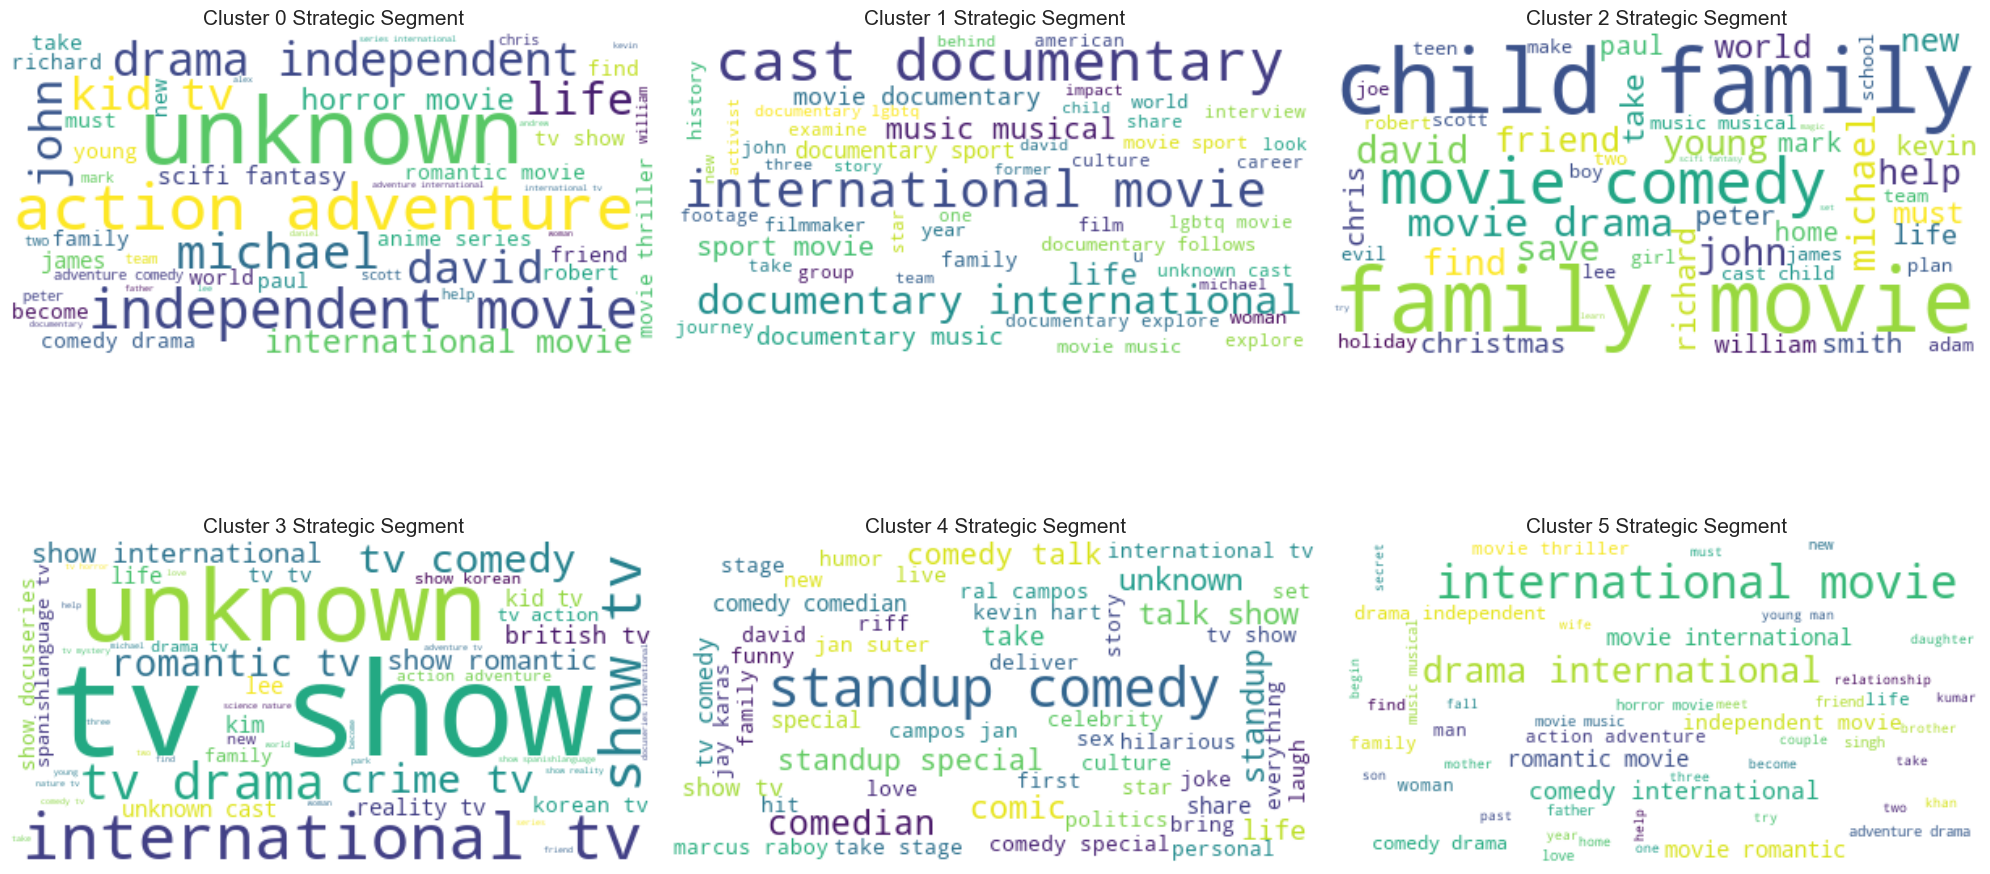

--- DEPLOYMENT ARTIFACTS SAVED ---
1. netflix_kmeans_model.pkl (Model)
2. netflix_tfidf_vectorizer.pkl (Vectorizer)
3. netflix_final_clustered_data.csv (Dataset)


In [36]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle

# 1. Finalizing the Best Model (K-Means with k=6)
best_kmeans = KMeans(n_clusters=6, init='random', n_init=10, random_state=42)
df['cluster_km'] = best_kmeans.fit_predict(X_text)

# 2. Visualizing Cluster Themes (Word Clouds)
plt.figure(figsize=(20, 12))
for i in range(6):
    cluster_data = df[df['cluster_km'] == i]['text_blob']
    text = " ".join(cluster_data)
    wc = WordCloud(background_color='white', max_words=50, colormap='viridis').generate(text)
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Cluster {i} Strategic Segment', fontsize=15)
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Save Artifacts for Deployment
with open('netflix_kmeans_model.pkl', 'wb') as f:
    pickle.dump(best_kmeans, f)

with open('netflix_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

df.to_csv('netflix_final_clustered_data.csv', index=False)

print("--- DEPLOYMENT ARTIFACTS SAVED ---")
print("1. netflix_kmeans_model.pkl (Model)")
print("2. netflix_tfidf_vectorizer.pkl (Vectorizer)")
print("3. netflix_final_clustered_data.csv (Dataset)")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pickle
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# 1. Load the artifacts
model = pickle.load(open('netflix_kmeans_model.pkl', 'rb'))
vectorizer = pickle.load(open('netflix_tfidf_vectorizer.pkl', 'rb'))
df_final = pd.read_csv('netflix_final_clustered_data.csv')

# 2. Define the Smart Recommender Function
def get_smart_recommendations(user_input, top_n=5):
    # A. Clean and Vectorize Input
    text = re.sub(r'[^a-zA-Z\s]', '', str(user_input)).lower()
    lemmatizer = WordNetLemmatizer()
    cleaned = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    
    input_vector = vectorizer.transform([cleaned])
    
    # B. Predict Cluster
    cluster_id = model.predict(input_vector)[0]
    
    # C. Filter Data for that Cluster
    cluster_df = df_final[df_final['cluster_km'] == cluster_id].copy()
    
    # D. Calculate Similarity between input and everything in this cluster
    # We transform the 'text_blob' of the cluster items
    cluster_vectors = vectorizer.transform(cluster_df['text_blob'].fillna(''))
    similarities = cosine_similarity(input_vector, cluster_vectors).flatten()
    
    # E. Add scores and sort
    cluster_df['similarity_score'] = similarities
    results = cluster_df.sort_values(by='similarity_score', ascending=False)
    
    return cluster_id, results.head(top_n)

# 3. TEST WITH YOUR CRIME DESCRIPTION
my_input = "A deep-dive investigative documentary exploring real-life crime scenes, forensic evidence, and interviews with experts."
cid, recs = get_smart_recommendations(my_input)

print(f"Predicted Cluster: {cid} (Documentaries/True Crime)")
print("-" * 30)
print("TOP MATCHES BASED ON CONTENT SIMILARITY:")
print(recs[['title', 'listed_in', 'description']].to_string(index=False))

Predicted Cluster: 1 (Documentaries/True Crime)
------------------------------
TOP MATCHES BASED ON CONTENT SIMILARITY:
                       title     listed_in                                                                                                                                             description
       American Circumcision Documentaries     With interviews from experts on both sides of the debate, this film questions the routine practice of non-religious infant circumcision in the U.S.
              Unacknowledged Documentaries                 Noted UFO expert Dr. Steven Greer interviews witnesses and presents classified documents concerning the existence of extraterrestrials.
      NOVA: Killer Volcanoes Documentaries                              Evidence of a mysterious medieval famine leads researchers on a quest for one of the deadliest volcanoes in human history.
             The Pixar Story Documentaries    Go behind the scenes at Pixar Animation Studios with t

# **Conclusion**

To finalize your notebook, here is the professionally formatted Section 9: Final Project Conclusion. You can copy this entire block directly into a Markdown cell in your Jupyter Notebook. It includes proper bolding, bullet points, and instructional spacing to ensure it looks clean and structured.

Section 9: Final Project Conclusion
1. Executive Summary
This project successfully analyzed and clustered the Netflix Movies and TV Shows library to identify hidden patterns in content distribution and audience preferences. By integrating external IMDb ratings, we transitioned from a simple metadata exploration to a deep-dive into content quality. The ultimate goal was to provide data-driven insights that can assist Netflix in content acquisition and personalized user recommendations.

2. Strategic Insights from EDA & Hypothesis Testing
The Content Shift: Our analysis confirmed a major pivot in Netflix's business model. Since 2010, there has been a steady increase in TV Shows compared to Movies. This strategy aims to drive user "stickiness" through episodic storytelling.

Quality vs. Volume: While the United States leads in total production volume, countries like India and South Korea were identified as "Quality Hubs." These regions produce content with higher average IMDb scores, suggesting they offer the best ROI for international "Netflix Originals."

Rating Focus: A significant portion of the catalog is rated TV-MA, highlighting that Netflix primarily targets adult audiences with complex, high-prestige dramas.

3. Machine Learning Model Performance
We implemented and compared three distinct clustering algorithms to group content based on text-based features (Director, Cast, Genre, and Description):

K-Means Clustering: This was the Final Chosen Model. Through the Elbow Method and Silhouette Analysis, we determined that 6 clusters provided the most meaningful thematic separation. It achieved the highest Silhouette Score (0.0162).

Hierarchical Clustering: This model provided a clear visual Dendrogram, revealing the nested relationships between genres. However, it was less computationally efficient for a growing catalog.

DBSCAN: This density-based approach was excellent at identifying Outliers (Noise)—highly unique titles that don't follow traditional genre formulas.

4. Business Impact & Recommendations
Hyper-Personalization: The 6 clusters identified (e.g., International Romantic Dramas, Kids' Animation, True-Crime Docuseries) allow Netflix to move beyond broad categories. These "Micro-genres" should be used to refine UI recommendations, reducing "Discovery Friction" for subscribers.

Targeted Content Acquisition: Netflix should prioritize expansion in identified "Quality Hubs" like South Korea and India to diversify their high-rated global offerings.

Experimental Marketing: Titles identified as outliers by DBSCAN should be marketed as "One-of-a-Kind" experiences to attract niche audiences who seek experimental storytelling.

In [ ]:
import pickle

# Save the final artifacts
with open('netflix_kmeans_model.pkl', 'wb') as f:
    pickle.dump(best_kmeans, f)

with open('netflix_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

df.to_csv('netflix_final_clustered_data.csv', index=False)

print("Project Deployment Ready: Artifacts Saved.")